# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
Dataset - https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from statistics import mode

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head() #first 5 rows of data set

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploring Dataset

In [3]:
df.shape

(32560, 15)

Observation - Dataset is containing total of 32560 rows and 15 columns

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Observation - The dataset contains the information of 51 state samples of US population.The dataset contains 15 columns including the features and the target variable. Here,Income column is the label which is less than or greater than 50K depending on the various features like Age, Workclass, Fnlwgt,Education, Education_num, marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week and Native_country.As Income variable has two classes i.e <=50K or >=50, it is a Classification Problem Statement and we need to predict that whether the person's income is over 50K or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation - Work, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income are of categorical type while Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are of Numerical Data type

# Null Value/Missing Data Analysis

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation - There is no Null or missing data

# Zero Value Analysis

In [7]:
(df==0).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

Observation - Two Columns Capital_gain and Capital_loss contain 0 value which is ok

In [8]:
#found ? for in some fields while exploring data set.. lets analyse which fields are containing ? value

# Checking for ?

In [9]:
(df==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Observation - 3 of the columns are containing ? Workclass, Occupation and Native_country, all these three columns are categorical in nature. we can impute them with Mode

In [10]:
df.replace({' ?': np.nan}, inplace=True)

1) handling nan in WorkClass

In [11]:
mode_value = df['Workclass'].mode()[0]
df['Workclass'].fillna(value = mode_value,inplace = True)

2) Handling nan in Occupation

In [12]:
mode_value = df['Occupation'].mode()[0]
df['Occupation'].fillna(value = mode_value,inplace = True)

3) handling nan in Native Country

In [13]:
mode_value = df['Native_country'].mode()[0]
df['Native_country'].fillna(value = mode_value,inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
(df==' ?').sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation - Thus we have replaced ? throughout data frame with valid values

# Drop Duplicate Data

In [16]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Observation - all the duplicate rows have been removed thus we are left with 32536 data rows only

# Discriptive Analysis

In [17]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536,3.253600e+04,32536,32536.000000,32536,32536,32536,32536,32536,32536.000000,32536.000000,32536.000000,32536,32536
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24509,NaN,10494,NaN,14970,5979,13187,27794,21774,NaN,NaN,NaN,29734,24697
mean,38.585536,NaN,1.897843e+05,NaN,10.081725,NaN,NaN,NaN,NaN,NaN,1078.410069,87.370912,40.440343,NaN,NaN
std,13.638193,NaN,1.055563e+05,NaN,2.571622,NaN,NaN,NaN,NaN,NaN,7388.068465,403.107737,12.347079,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.369932e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Description -
- Age - Min value = 17, max value = 90, 50% of people are having age below 37
- Workclass - there are 8 unique value, max data 24509 lies from private class
- Education - there are 16 unique values in this field, 10494 out of total are HS-grad
- Education_num - min value = 1, max value = 16, 50% of data have education_num below 10
- Marital_status - 7 unique values, 14970 are of Married-civ-spouse type
- Occupation - there are 14 unique values, max 5979 are of Prof-specialty occupation type
- Relationship - there are 6 unique values, and 13187 records are of type husband
- Race - there are 5 unique entries and most occuring race is white
- Sex - there are 2 unique value and the most occuring is male
- Capital_gain - min value is 0 and max value is 99999, 75% of records are having capital_gain below 0
- Capital_loss - min value is 0 and max value is 4356, 75% of records are having capital_loss below 0
- Hours_per_week - min value is 1 and max is 99, 50% of people are spending below 40 hours per week
- Native_country - there are 41 unique countries, United-States is occuring the most
- Income - this is the target variable containing two unique values, most of the people are having income below 50k

AS this is a binary classification problem setting Target Variable "Income" as 0 and 1 means "<=50k" = 0 and ">50k" as 1

# Setting Income for Binary Classification  <=50K as 0 and >50K as 1

In [17]:
df['Income'].mask(df['Income'] == ' <=50K', 0, inplace=True)
df['Income'].mask(df['Income'] == ' >50K', 1, inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Interpreting Relationship between Features and Target Variable

In [18]:
#separating the Features and Target Variable
x = df.drop(columns = ['Income'])
y = df['Income']

In [19]:
x.shape

(32536, 14)

# Analysing Target Variable

In [20]:
y.unique()

array([0, 1], dtype=object)

In [21]:
y.nunique()

2

In [22]:
y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

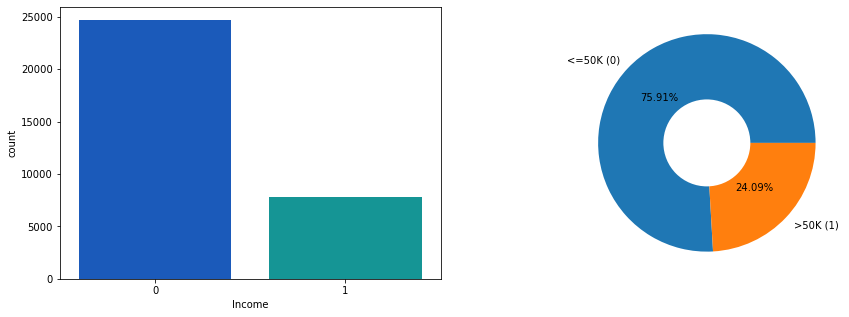

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y, palette ='winter')

plt.subplot(1,2,2)
labels = '<=50K (0)','>50K (1)'
plt.pie(y.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 75% of people are earning below 50K

# Analysing Feature Variables

1) Workclass

In [31]:
x['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [32]:
x['Workclass'].nunique()

8

In [33]:
x['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

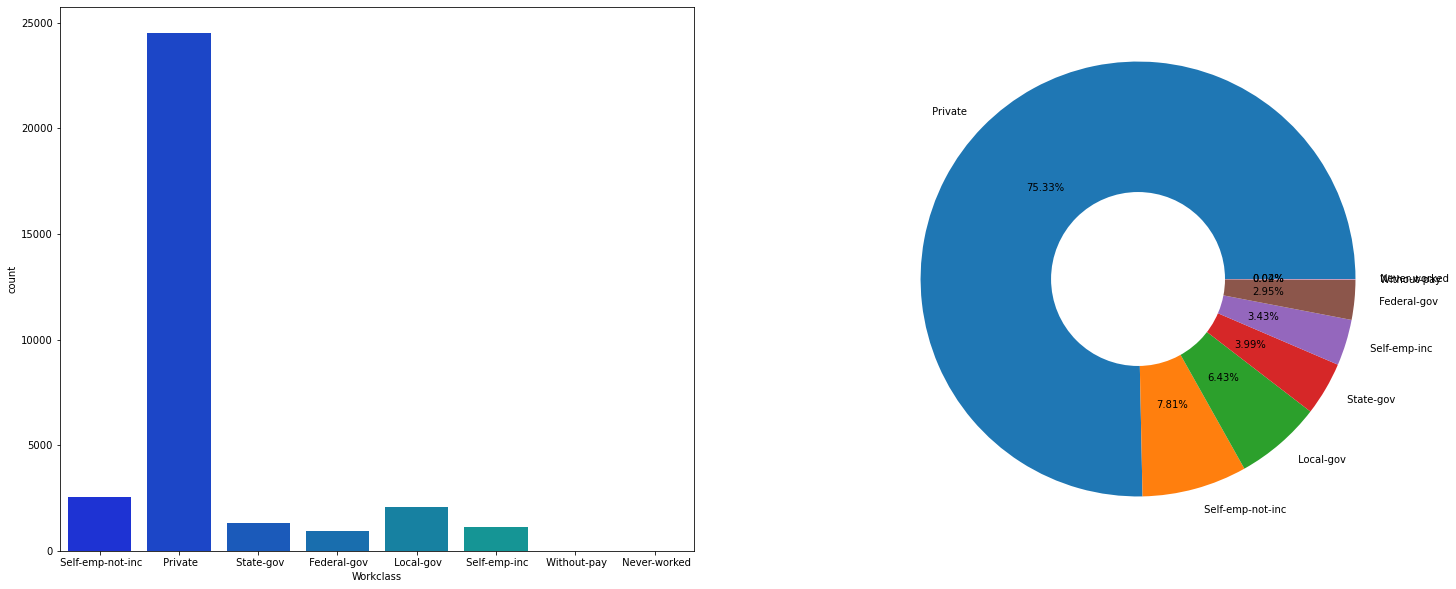

In [40]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.countplot(x['Workclass'], palette ='winter')

plt.subplot(1,2,2)
labels =  ' Private',' Self-emp-not-inc',' Local-gov', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'
plt.pie(x['Workclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation- 75% people are from Private sector

2) Education

In [41]:
x['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [42]:
x['Education'].nunique()

16

In [43]:
x['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

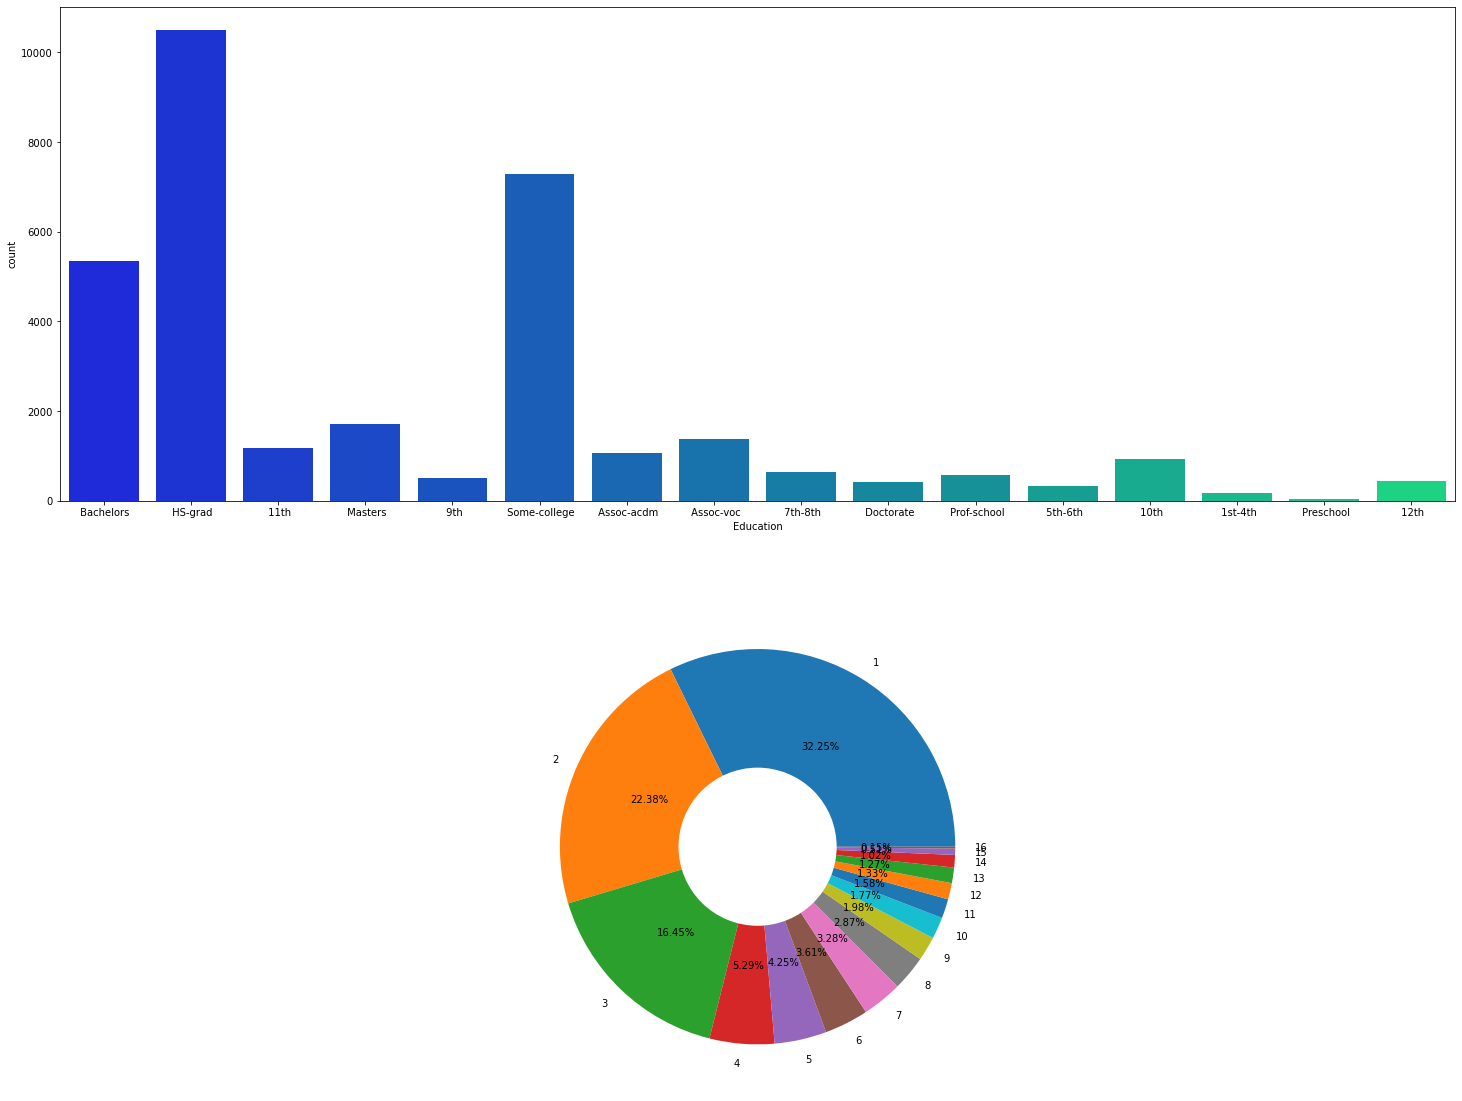

In [46]:
plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
sns.countplot(x['Education'], palette ='winter')

plt.subplot(2,1,2)
labels =  '1','2','3', '4', '5', '6', '7', '8','9','10','11','12','13','14','15','16'
plt.pie(x['Education'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

observation - 32% people are HS-Grad and 22% are from some other college

3) Marital_status

In [47]:
x['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [48]:
x['Marital_status'].nunique()

7

In [49]:
x['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

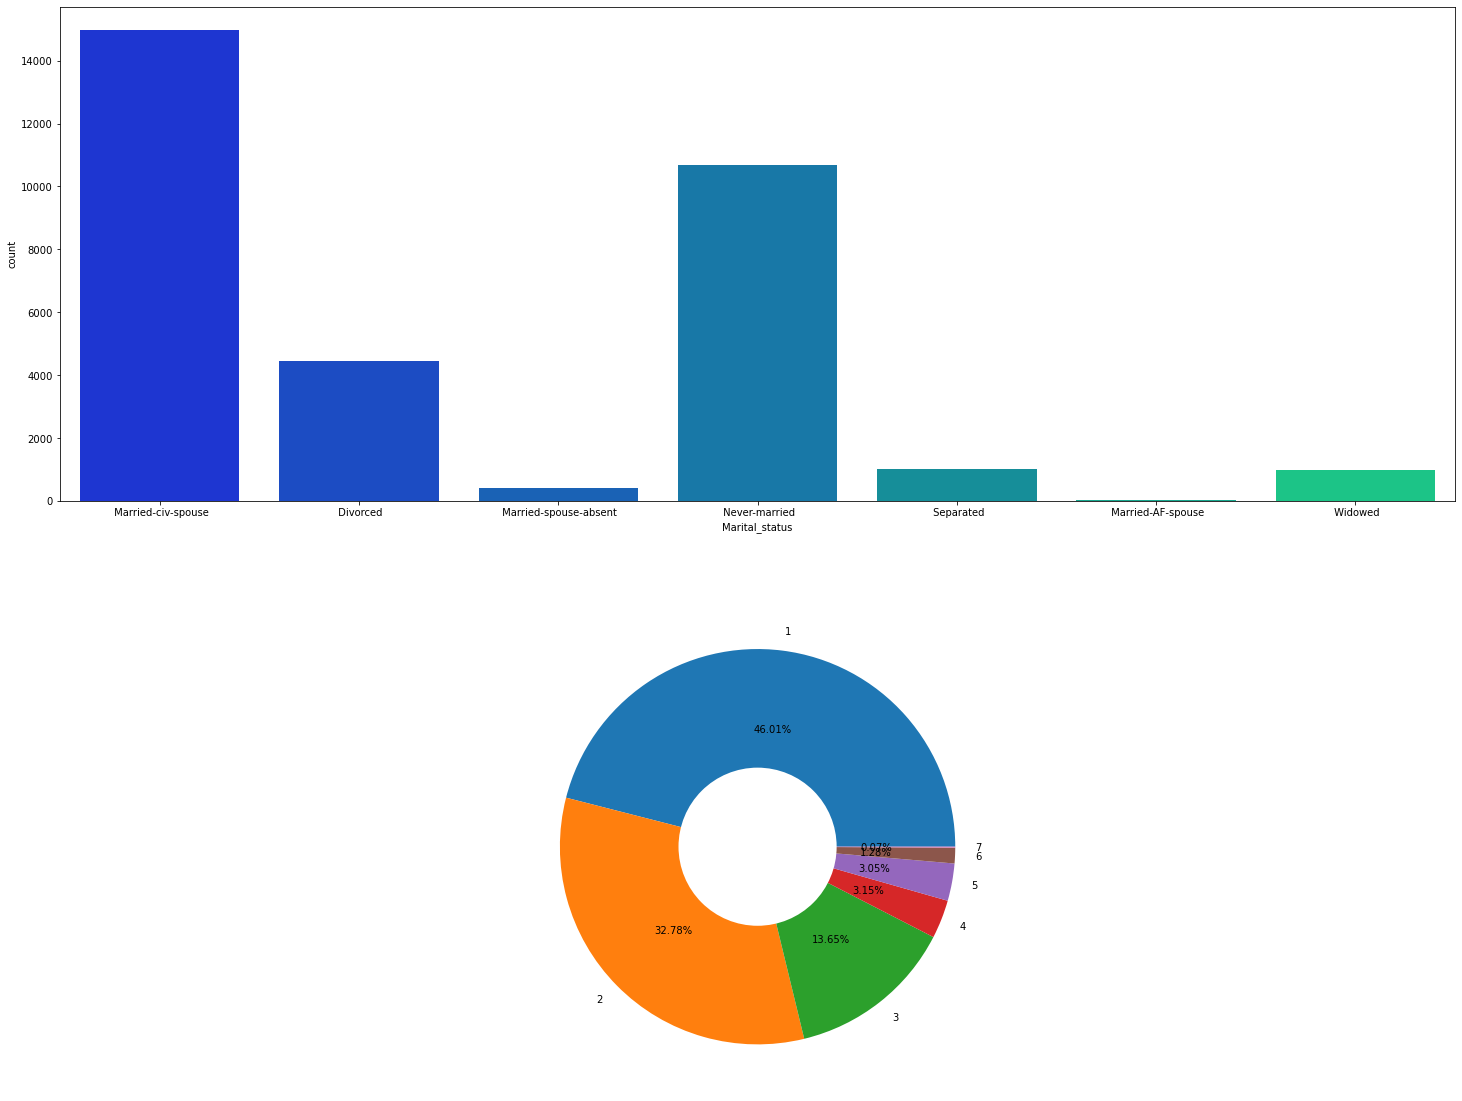

In [50]:
plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
sns.countplot(x['Marital_status'], palette ='winter')

plt.subplot(2,1,2)
labels =  '1','2','3', '4', '5', '6', '7'
plt.pie(x['Marital_status'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 46% people are Married-civ-spouse, 32% are never married

4) Occupation

In [51]:
x['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [52]:
x['Occupation'].nunique()

14

In [53]:
x['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

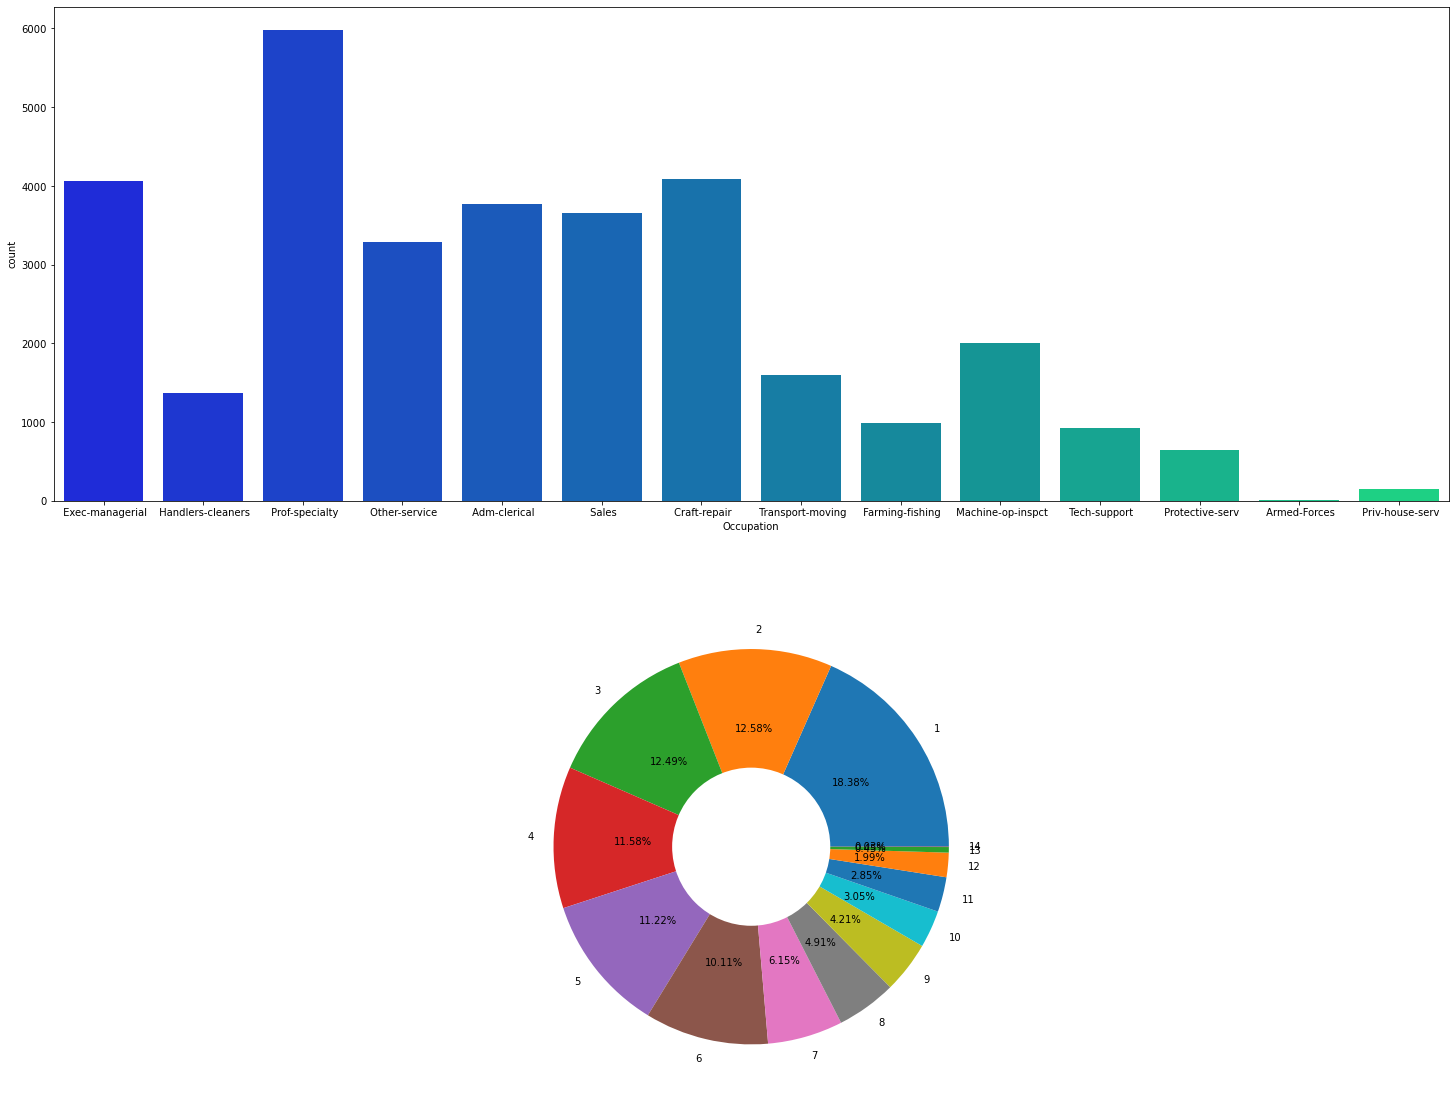

In [54]:
plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
sns.countplot(x['Occupation'], palette ='winter')

plt.subplot(2,1,2)
labels =  '1','2','3', '4', '5', '6', '7', '8','9','10','11','12','13','14'
plt.pie(x['Occupation'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 18% of people are professors, 12.58% are of craft repair, 12.49% are ex-managerial, 11.58% are clerical administrators

5) Relationship

In [55]:
x['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [56]:
x['Relationship'].nunique()

6

In [57]:
x['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

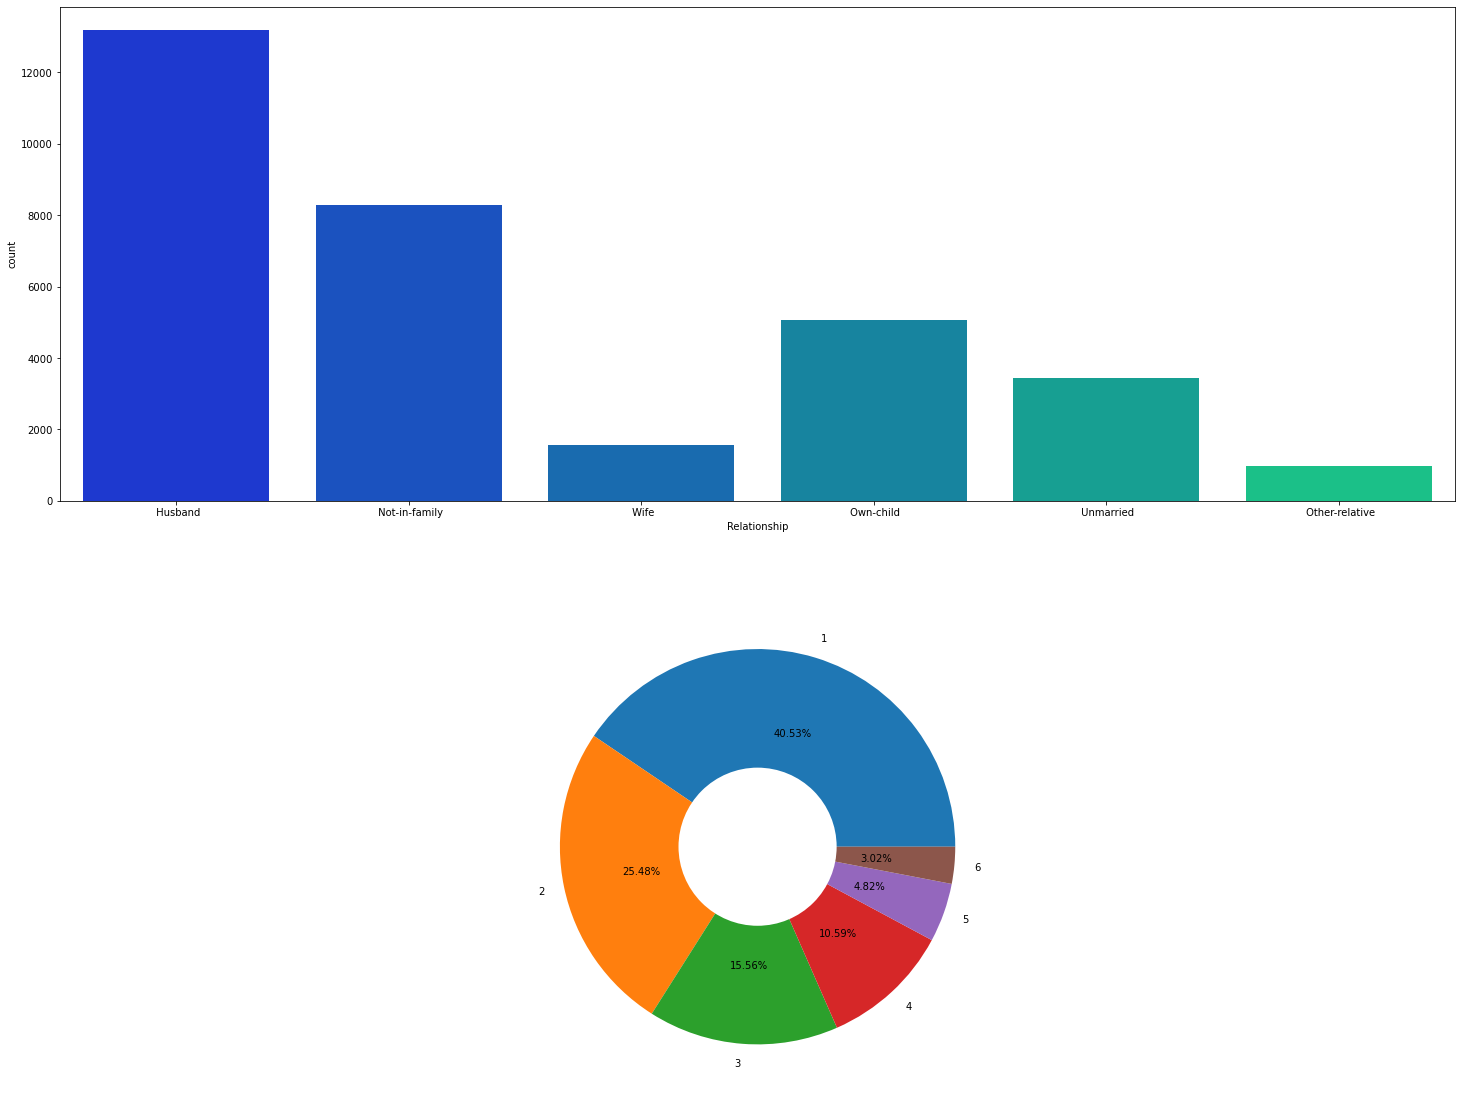

In [59]:
plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
sns.countplot(x['Relationship'], palette ='winter')

plt.subplot(2,1,2)
labels =  '1','2','3', '4', '5', '6'
plt.pie(x['Relationship'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 40% of people are husband, 25% are not-in family, 15% are own-child, 10% are unmarried

6) Race

In [60]:
x['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [61]:
x['Race'].nunique()

5

In [62]:
x['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

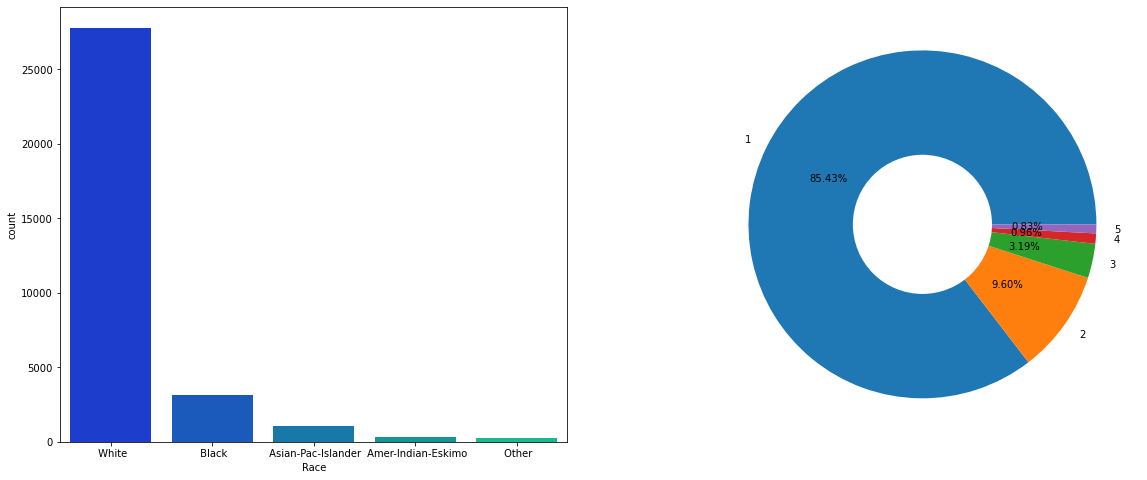

In [65]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x['Race'], palette ='winter')

plt.subplot(1,2,2)
labels =  '1','2','3', '4', '5'
plt.pie(x['Race'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 85% of people are from white race

7) Sex

In [66]:
x['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [67]:
x['Sex'].nunique()

2

In [68]:
x['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

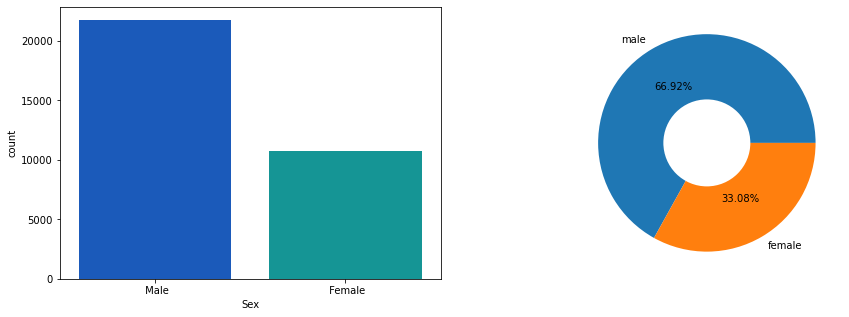

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['Sex'], palette ='winter')

plt.subplot(1,2,2)
labels =  'male','female'
plt.pie(x['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 67% people are Male while 33% are Female

8) Native_country

In [70]:
x['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [71]:
x['Native_country'].nunique()

41

In [72]:
x['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

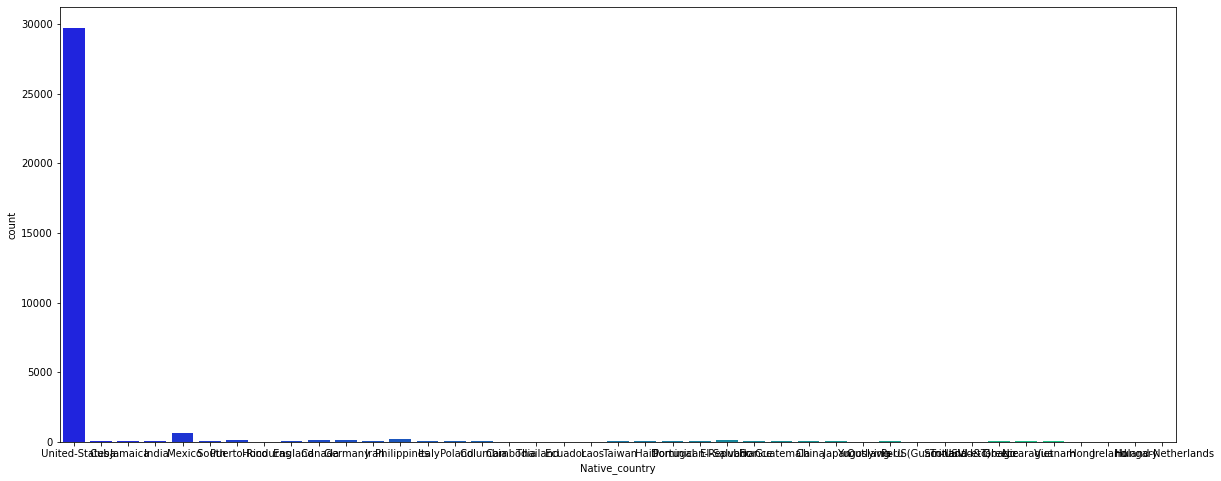

In [75]:
plt.figure(figsize=(20,8))
sns.countplot(x['Native_country'], palette ='winter')


Observation - Maximum number of people are from United-states

# Analysing Feature Variables wrt Income

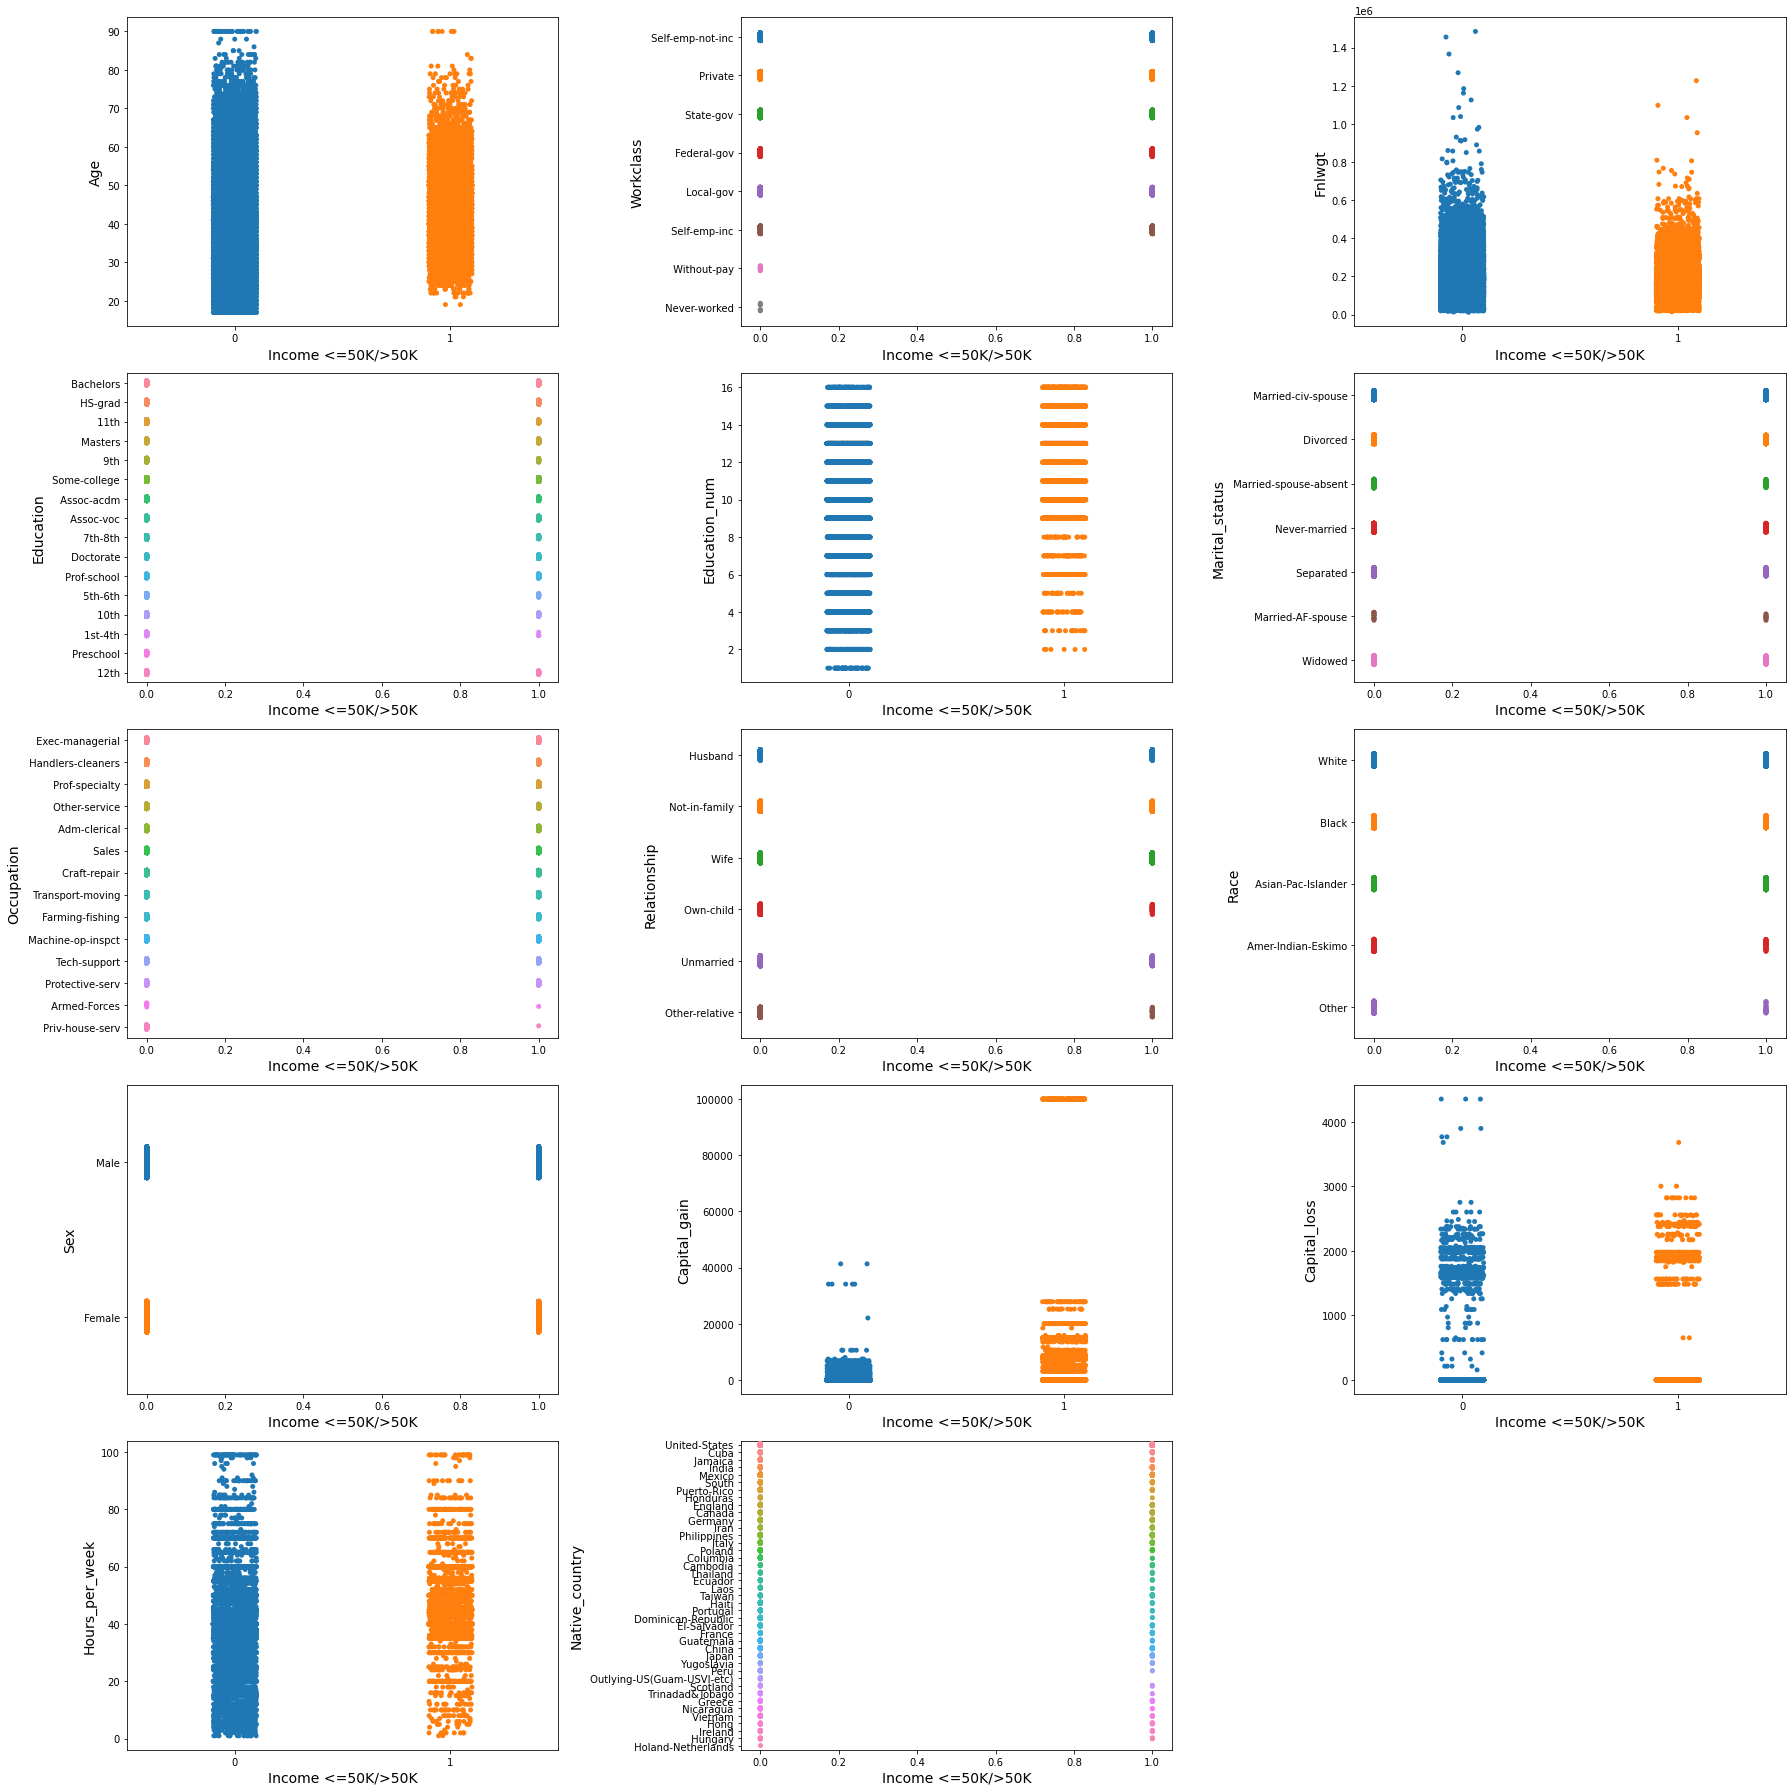

In [82]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=15:
        plt.subplot(5,3,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('Income <=50K/>50K',fontsize=14)
        plt.ylabel(col,fontsize=14)
    plotnum+=1
plt.tight_layout()

# Income wrt Workclass

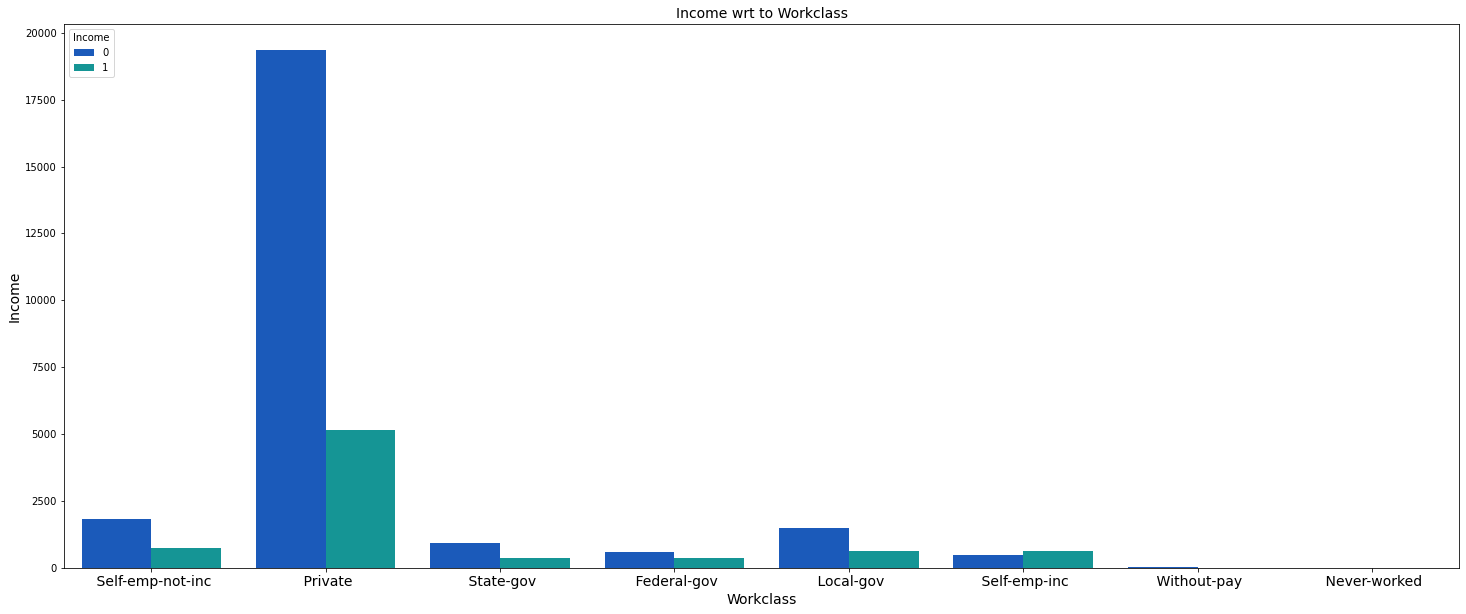

In [83]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Workclass', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Workclass',fontsize=14)
plt.xlabel('Workclass',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Education

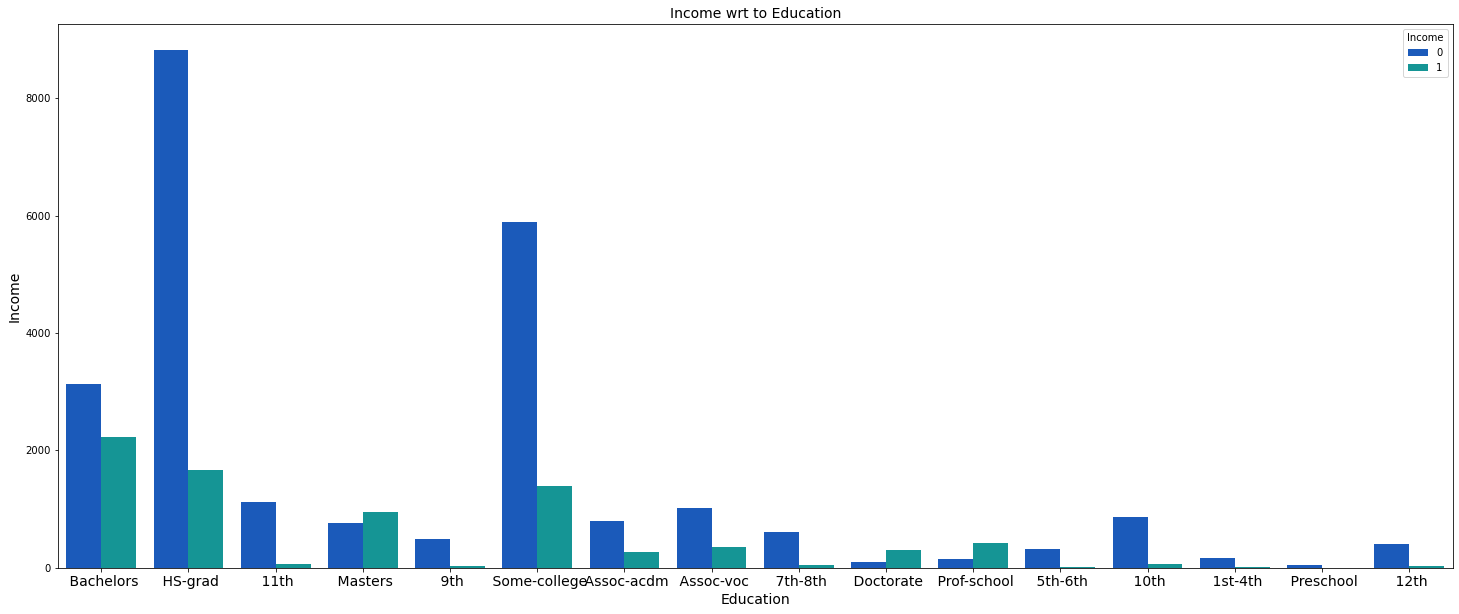

In [84]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Education', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Education',fontsize=14)
plt.xlabel('Education',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Marital_status

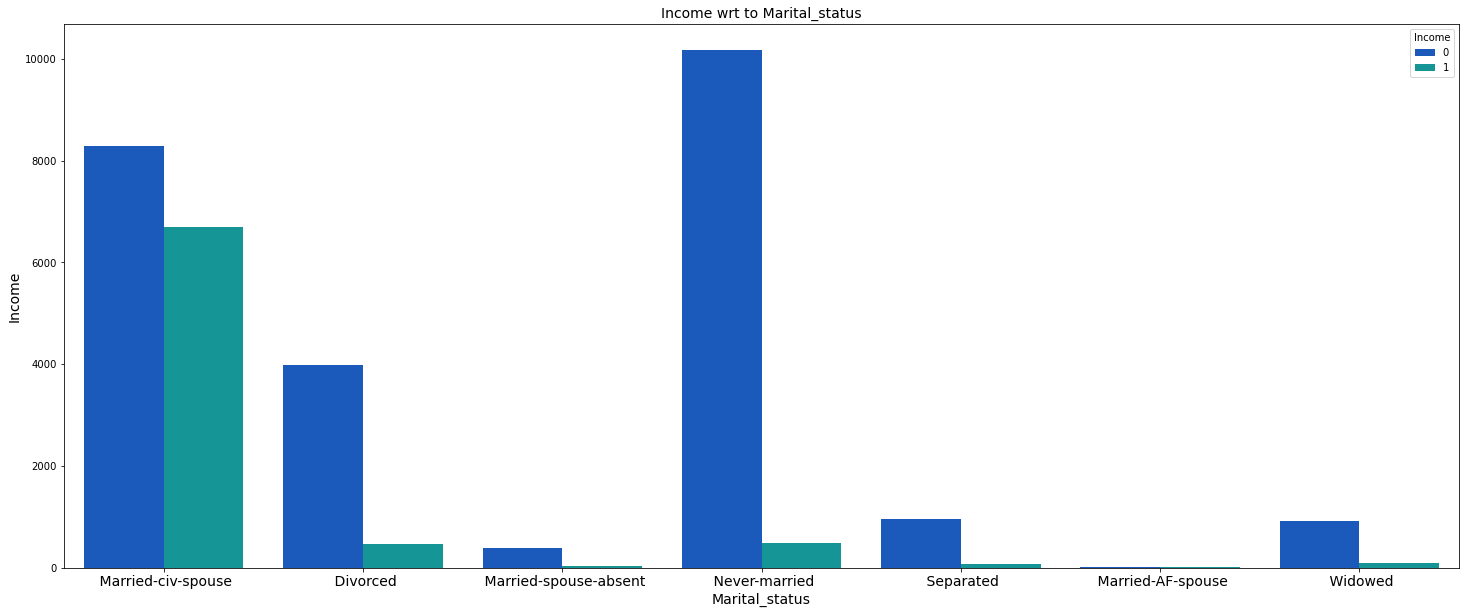

In [85]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Marital_status', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Marital_status',fontsize=14)
plt.xlabel('Marital_status',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Occupation

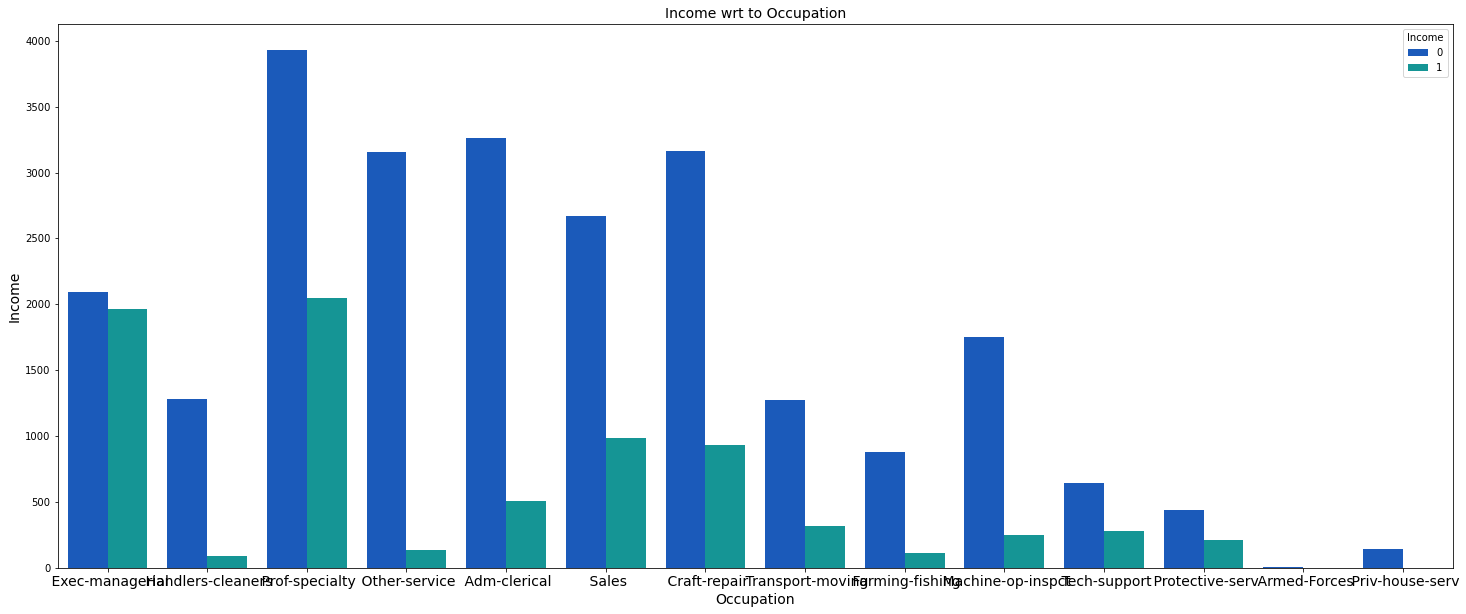

In [86]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Occupation', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Occupation',fontsize=14)
plt.xlabel('Occupation',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Relationship

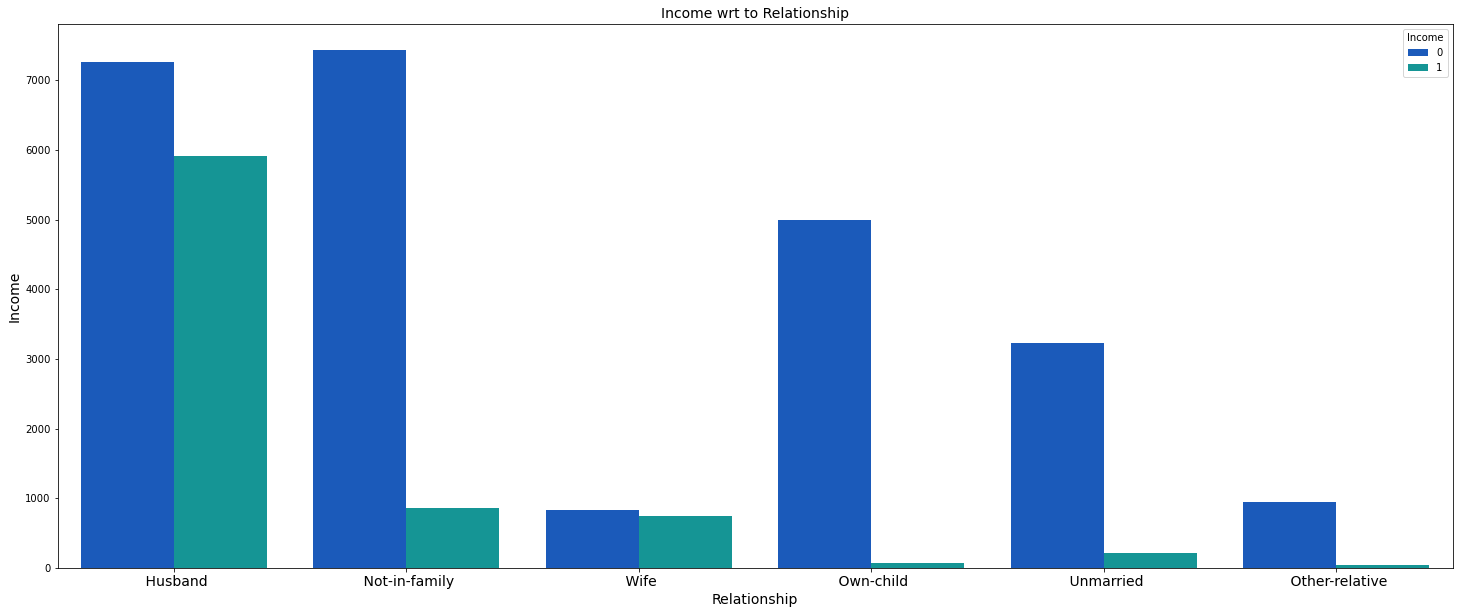

In [87]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Relationship', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Relationship',fontsize=14)
plt.xlabel('Relationship',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Race

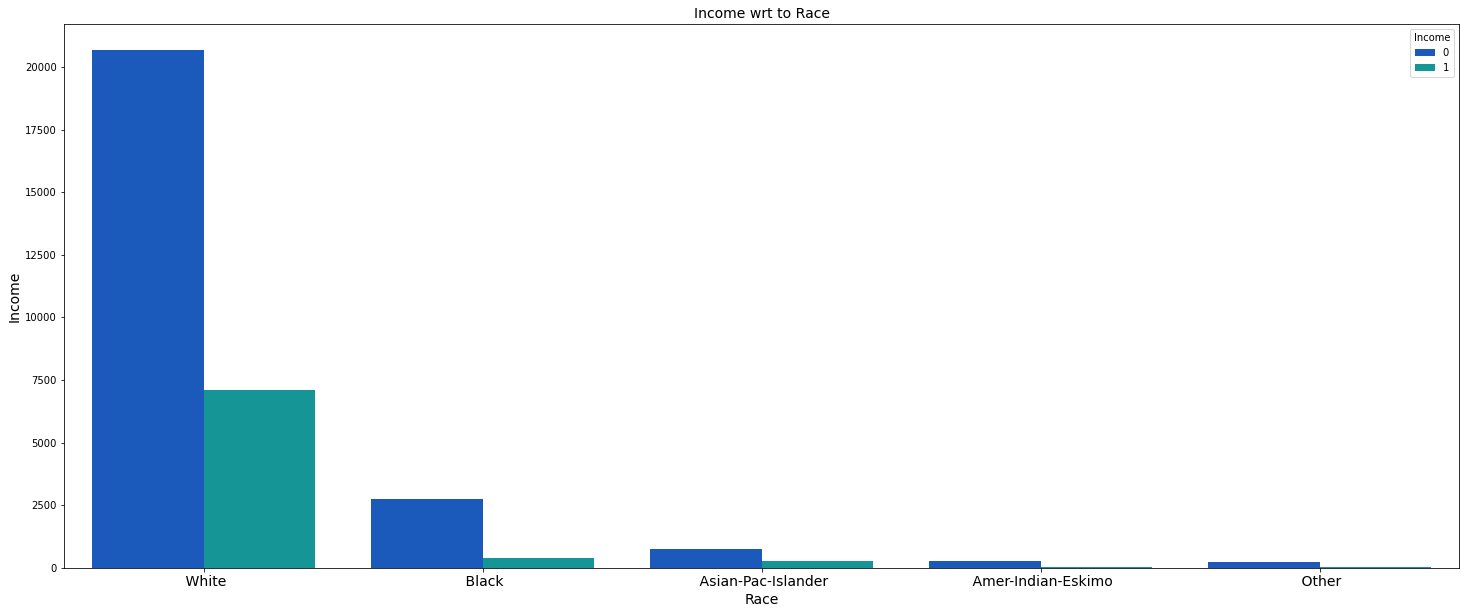

In [88]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Race', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Race',fontsize=14)
plt.xlabel('Race',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Sex

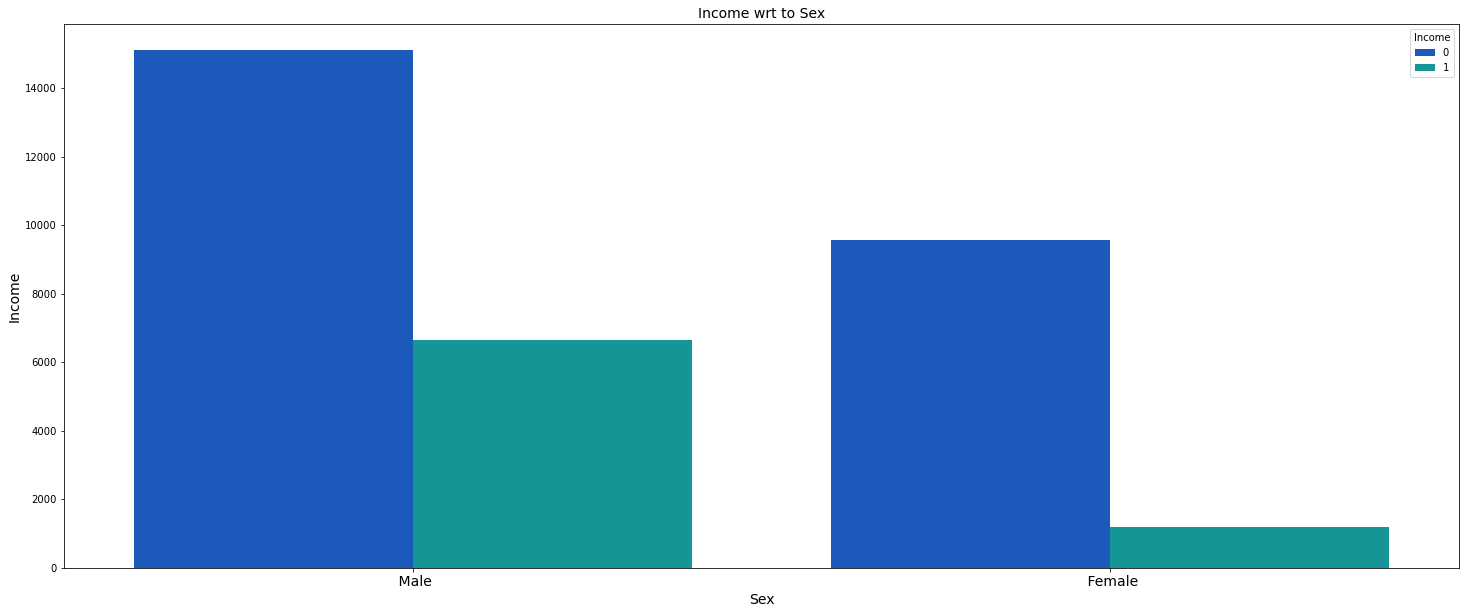

In [89]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Sex', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Sex',fontsize=14)
plt.xlabel('Sex',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Income wrt Native_country

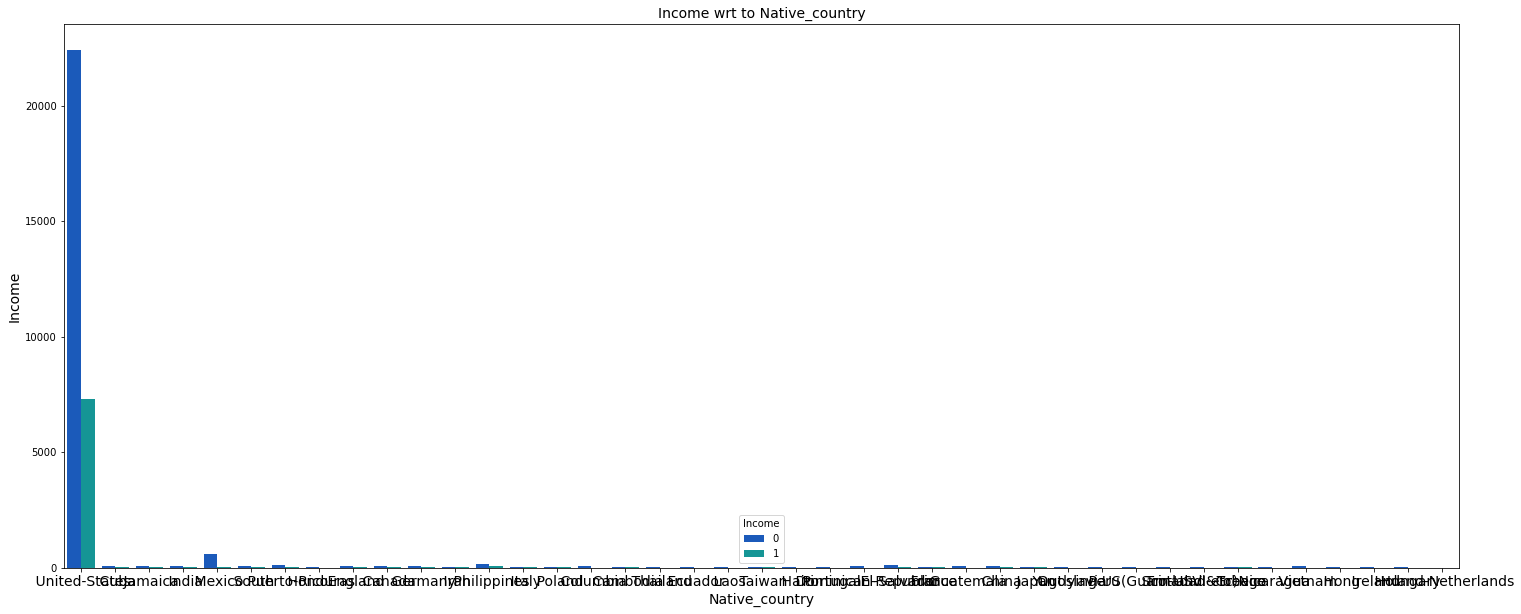

In [90]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Native_country', hue='Income', data = df,palette="winter")

plt.title('Income wrt to Native_country',fontsize=14)
plt.xlabel('Native_country',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.show()

# Visualising all data together

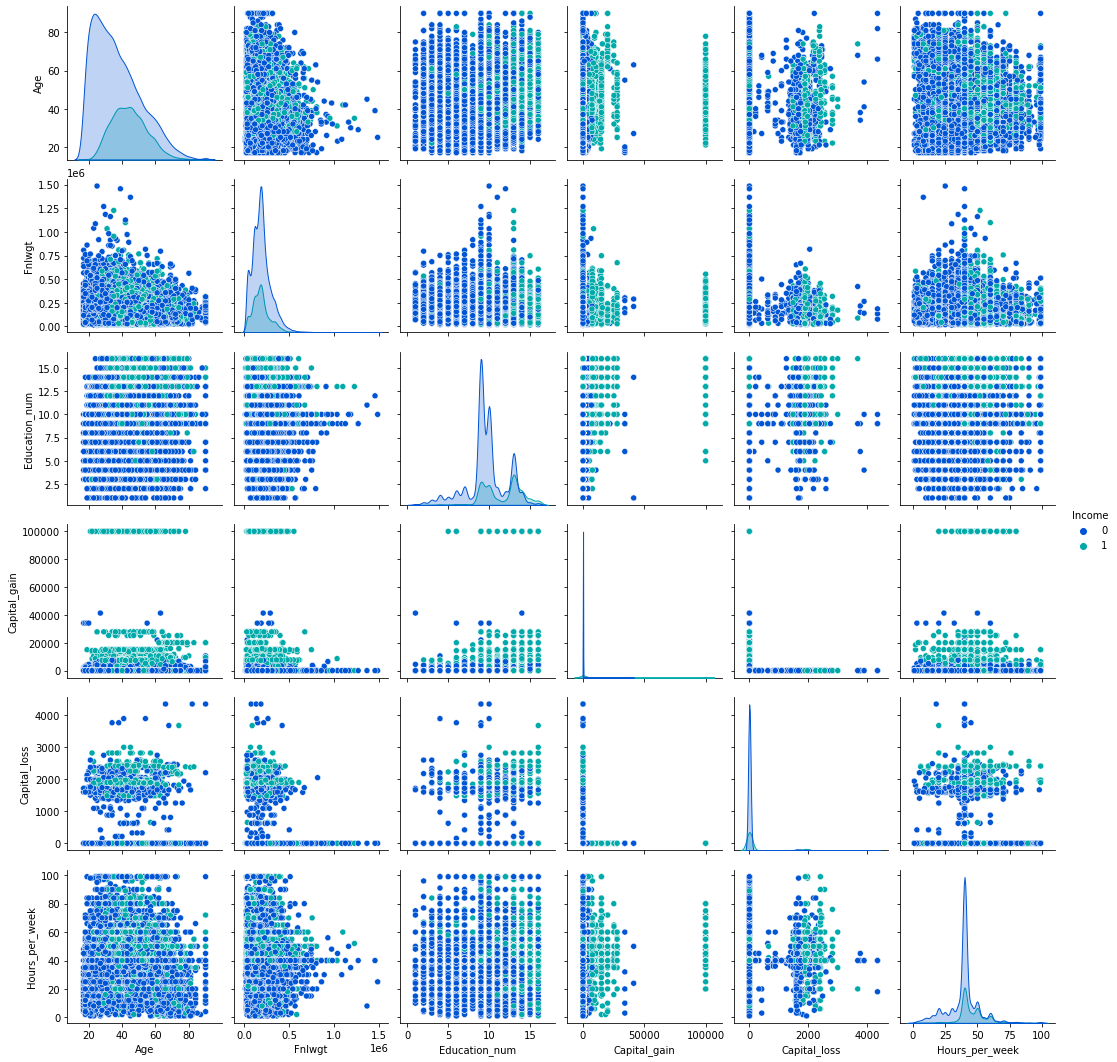

In [91]:
sns.pairplot(df, palette = 'winter', hue='Income')

# Label Encoding

In [23]:
#we need to convert categorical columns into numerical ones before proceeding further
label_encoder = preprocessing.LabelEncoder()

#encoding feature columns
df['Workclass']=label_encoder.fit_transform(df['Workclass'])

df['Education']=label_encoder.fit_transform(df['Education'])

df['Marital_status']=label_encoder.fit_transform(df['Marital_status'])

df['Occupation']=label_encoder.fit_transform(df['Occupation'])

df['Relationship']=label_encoder.fit_transform(df['Relationship'])

df['Race']=label_encoder.fit_transform(df['Race'])

df['Sex']=label_encoder.fit_transform(df['Sex'])

df['Native_country']=label_encoder.fit_transform(df['Native_country'])

df['Income']=label_encoder.fit_transform(df['Income'])

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


# Correlation

In [26]:
#lets find out the correlation between the columns
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


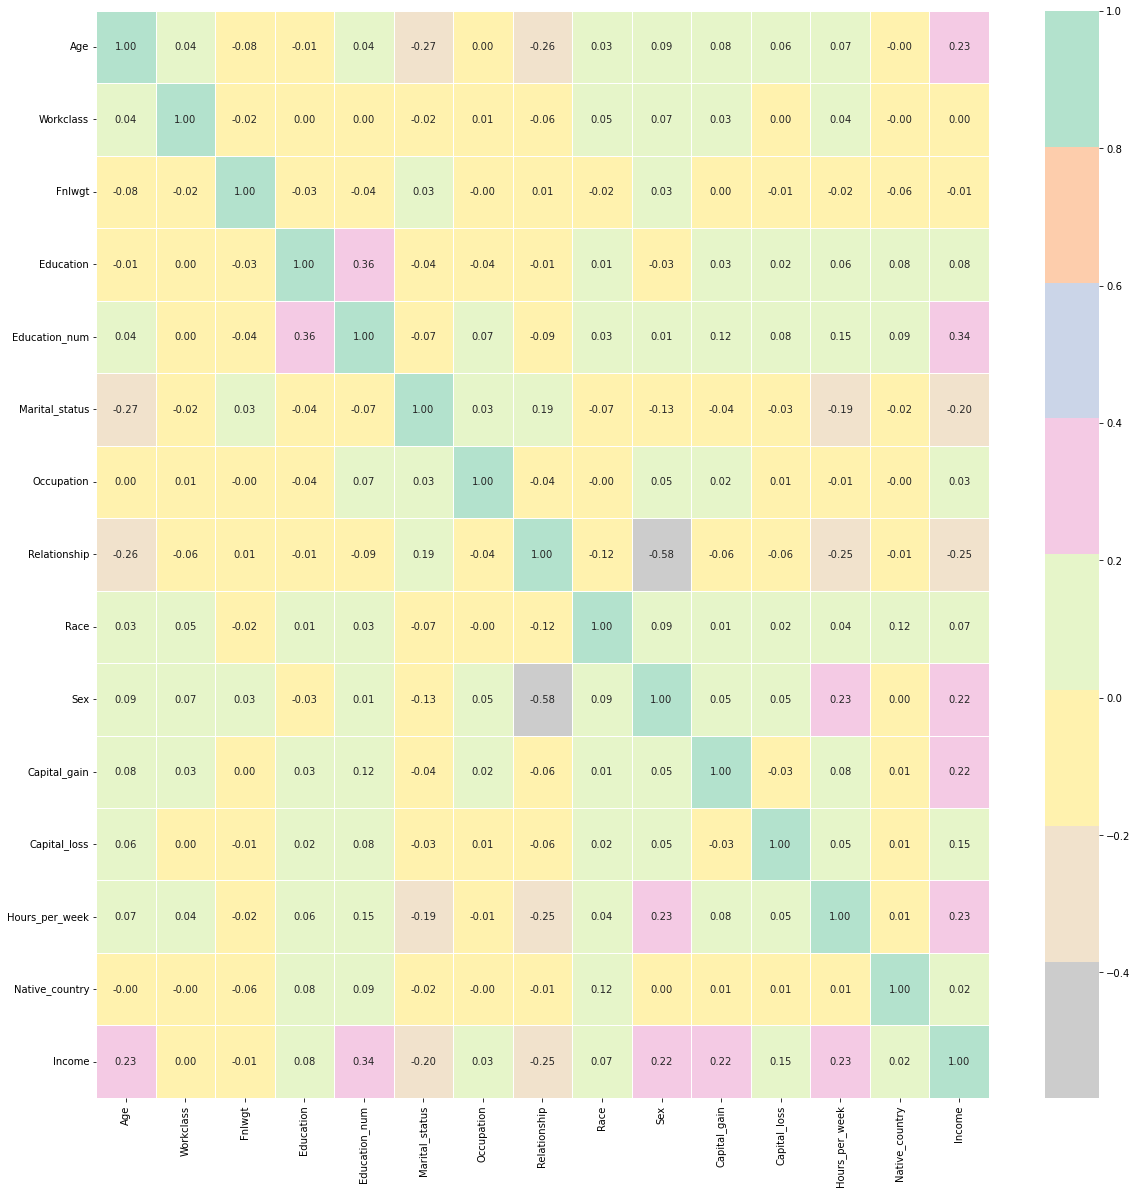

In [27]:
#lets plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,cmap='Pastel2_r')
plt.show()

Observation - There is no much correlation seen between the feature variables
- Highest correaltion is seen between Education and Education Number
- Income and Education Number are 34% correlated
- Income and age are 23% correlated
- Income sex and capital gain are 22% correlated
- Inocme and hours per week are 23% correlated

In [28]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Fnlwgt           -0.009521
Workclass         0.002747
Native_country    0.022858
Occupation        0.034490
Race              0.071855
Education         0.079361
Capital_loss      0.150498
Sex               0.215984
Capital_gain      0.223340
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

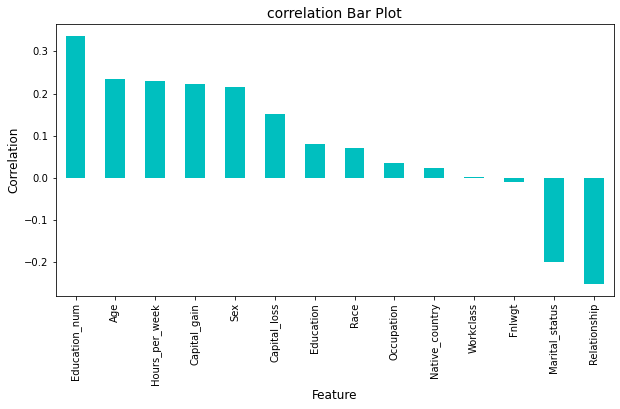

In [29]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation - Workclass and fnlwgt are least correlated to Income

# Detecting Multicollinearity with VIF and Data Cleaning

In [30]:
#separating the Features and Target Variable
x = df.drop(columns = ['Income'])
y = df['Income']

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           feature        VIF
0              Age   8.854864
1        Workclass   8.432595
2           Fnlwgt   4.042028
3        Education   9.231312
4    Education_num  18.736264
5   Marital_status   4.078949
6       Occupation   3.386156
7     Relationship   2.674008
8             Race  17.902926
9              Sex   4.499399
10    Capital_gain   1.045043
11    Capital_loss   1.061829
12  Hours_per_week  11.997830
13  Native_country  28.751761


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-

As VIF score for Native_country is quite high and this column doesn't have strong bond with Target so Lets drop that column and check VIF again

In [32]:
# VIF dataframe
vif_data1 = pd.DataFrame()

x.drop(['Native_country'],axis=1, inplace=True)

vif_data1["feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data1)

           feature        VIF
0              Age   8.387679
1        Workclass   8.301299
2           Fnlwgt   4.020082
3        Education   9.093016
4    Education_num  17.855364
5   Marital_status   3.954202
6       Occupation   3.370377
7     Relationship   2.546036
8             Race  15.725259
9              Sex   4.426899
10    Capital_gain   1.043242
11    Capital_loss   1.061551
12  Hours_per_week  11.648532


In [33]:
#VIF is almost under moderate range now.. now will select K best features for model training
df.drop(['Native_country'],axis=1, inplace=True)

In [34]:
df.shape

(32536, 14)

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
4,Education_num,4120.959861
7,Relationship,2186.644675
0,Age,1885.286977
12,Hours_per_week,1811.486632
10,Capital_gain,1708.021444
9,Sex,1591.944711
5,Marital_status,1344.129315
11,Capital_loss,753.959104
3,Education,206.203986
8,Race,168.848540


Observation- Workclass is least significant for training model, hence dropping that

In [36]:
x = x.drop(['Workclass'], axis = 1)
df = df.drop(['Workclass'], axis = 1)

In [37]:
df.shape

(32536, 13)

# Skewness

In [38]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Income             1.211640
dtype: float64

Observation-

The acceptable skewness range is +/- 0.5,Capital_gain, Capital_loss, Race, Income, Fnlwgt have high skewness involved.

# Distribution Curve

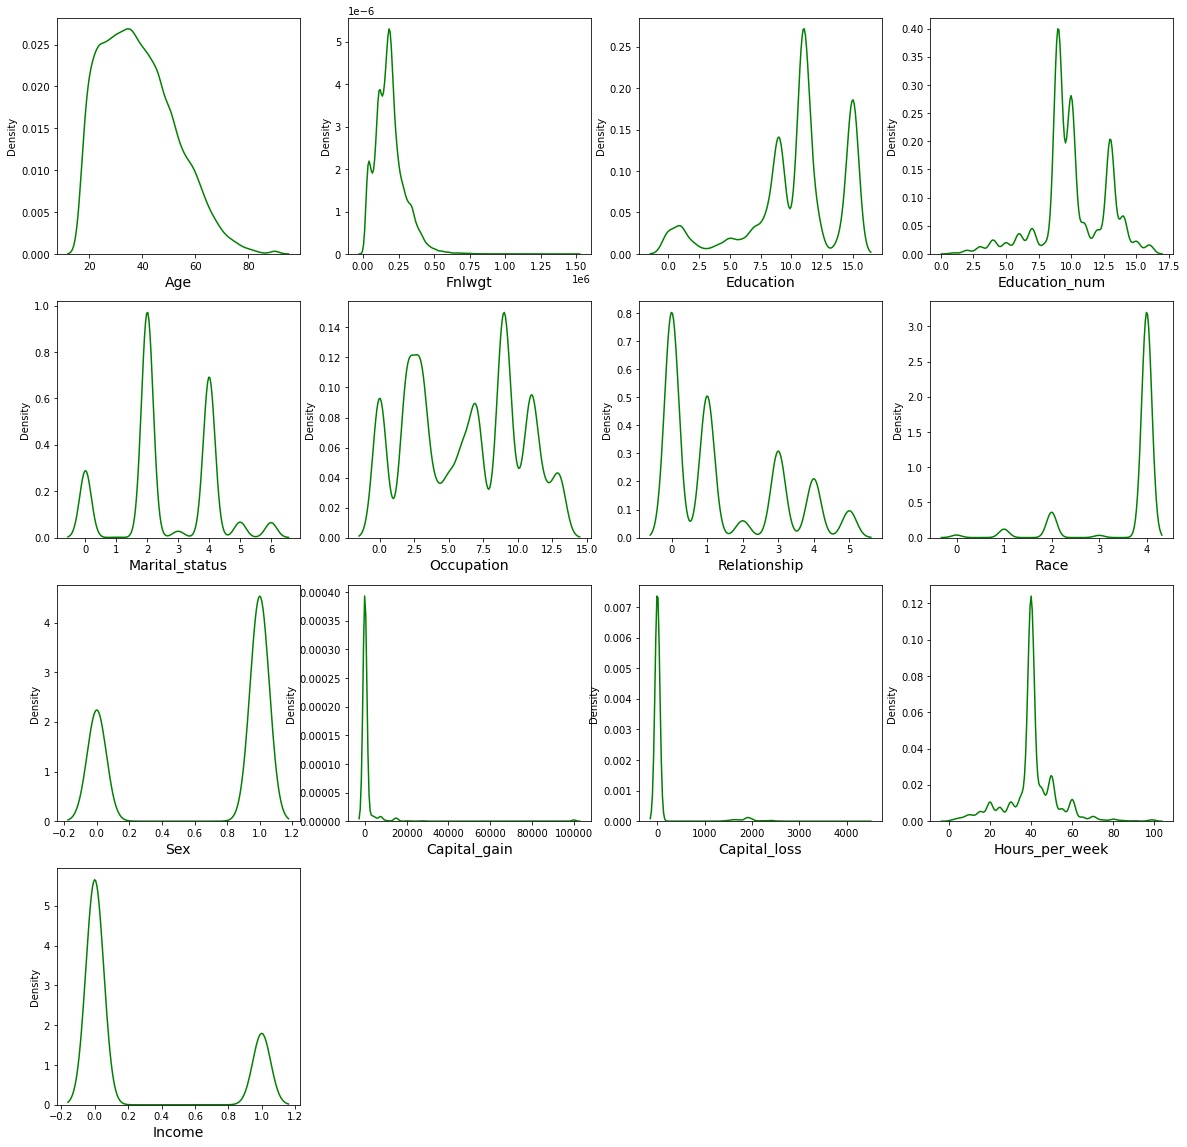

In [39]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - There is considerable amount of skewness in all feature variables and target. we need to treat it but first of all we need to check outliers and remove that

# Checking Outliers

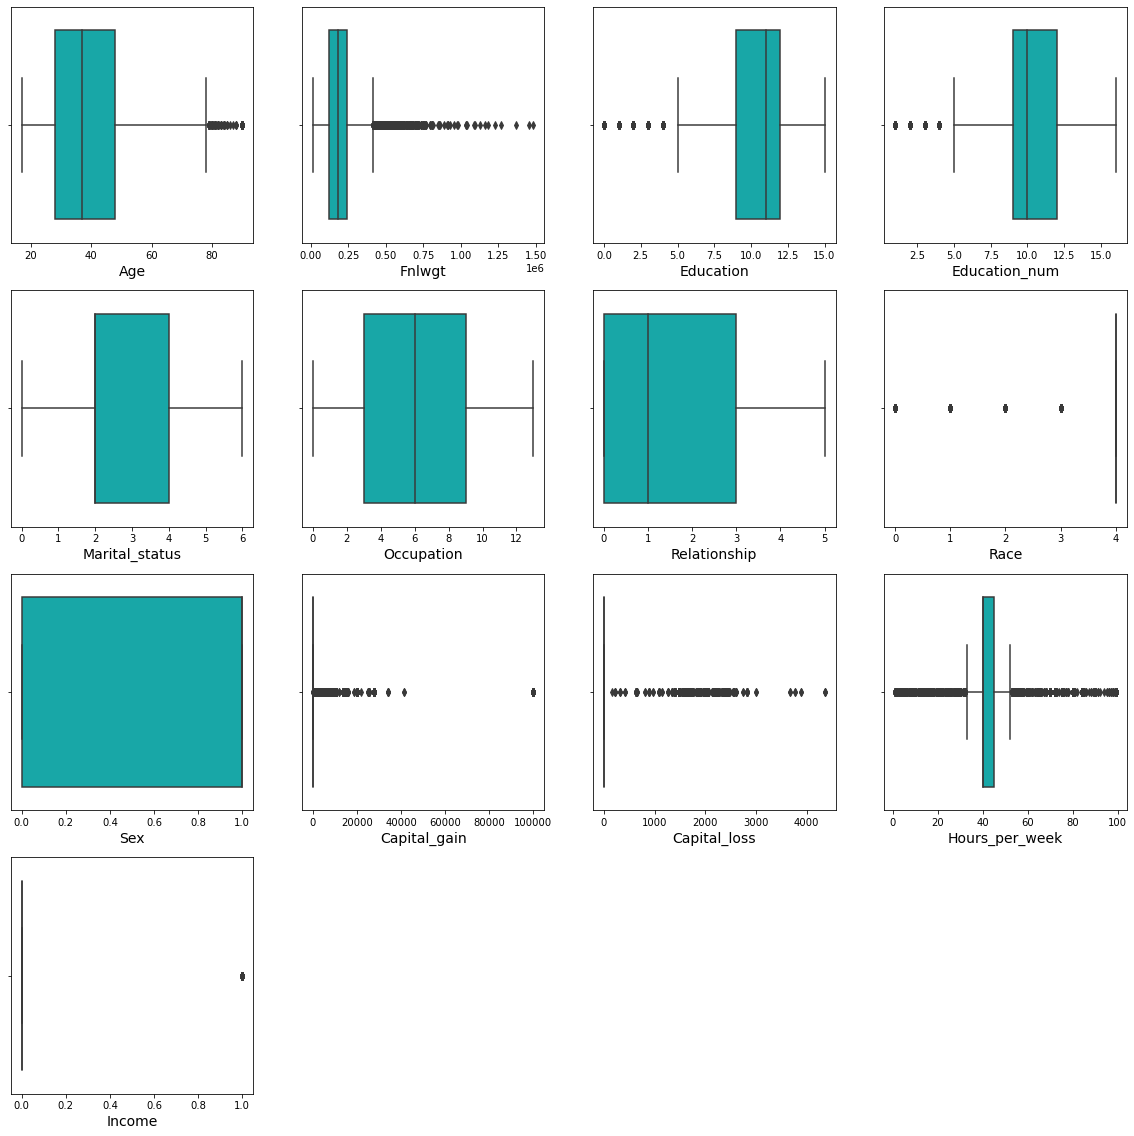

In [113]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected some of the feature variables and target variable have outliers. lets treat them with the help of z score method

# Removing Outliers

In [40]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0.836961,-1.008703,-0.335272,1.134817,-0.405890,-0.790197,-0.900122,0.393692,0.703036,-0.145969,-0.216747,-2.222450,-0.563389
1,-0.042934,0.245008,0.181506,-0.420646,-1.733664,-0.286803,-0.277868,0.393692,0.703036,-0.145969,-0.216747,-0.035664,-0.563389
2,1.056935,0.425720,-2.402383,-1.198377,-0.405890,-0.286803,-0.900122,-1.962450,0.703036,-0.145969,-0.216747,-0.035664,-0.563389
3,-0.776180,1.408036,-0.335272,1.134817,-0.405890,0.719986,2.211146,-1.962450,-1.422403,-0.145969,-0.216747,-0.035664,-0.563389
4,-0.116259,0.898091,0.439895,1.523683,-0.405890,-0.790197,2.211146,0.393692,-1.422403,-0.145969,-0.216747,-0.035664,-0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849505,0.639647,-0.852050,0.745951,-0.405890,1.475078,2.211146,0.393692,-1.422403,-0.145969,-0.216747,-0.197648,-0.563389
32556,0.103715,-0.335469,0.181506,-0.420646,-0.405890,-0.035106,-0.900122,0.393692,0.703036,-0.145969,-0.216747,-0.035664,1.774973
32557,1.423558,-0.358812,0.181506,-0.420646,2.249657,-1.545289,1.588892,0.393692,-1.422403,-0.145969,-0.216747,-0.035664,-0.563389
32558,-1.216128,0.110897,0.181506,-0.420646,0.921884,-1.545289,0.966639,0.393692,0.703036,-0.145969,-0.216747,-1.655506,-0.563389


In [41]:
z = np.abs(zscore(df))
z.shape

(32536, 13)

In [42]:
np.where(z>3) #detecting outliers where z>3

(array([    9,    10,    13, ..., 32508, 32526, 32528], dtype=int64),
 array([11,  7,  7, ...,  7,  7,  7], dtype=int64))

In [43]:
z.iloc[10] #checking one of the detected outliers

Age               0.629531
Fnlwgt            0.459357
Education         0.335272
Education_num     1.134817
Marital_status    0.405890
Occupation        0.719986
Relationship      0.900122
Race              3.140522
Sex               0.703036
Capital_gain      0.145969
Capital_loss      0.216747
Hours_per_week    0.035664
Income            1.774973
Name: 10, dtype: float64

In [44]:
#checking total number of rows where z>3
len(np.where(z>3)[0])

4156

In [45]:
#percent loss
percent_loss = 4156*100/32536
print("Percent Loss: ",percent_loss)

Percent Loss:  12.77354315220064


12% loss is accountable , lets treat outliers using IQR method instead of zscore

# Treating Outliers using IQR method

In [46]:
X = df.drop('Income', axis=1)
Y = df['Income']

#create new dataframe
X_new = pd.DataFrame()

def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    median = np.median(data)# calculating median 

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = median    #replacing outlier with median as all the variables are of integer type
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50.0,83311.0,9.0,13.0,2,3,0,4.0,1,0.0,0.0,40.0
1,38.0,215646.0,11.0,9.0,0,5,1,4.0,1,0.0,0.0,40.0
2,53.0,234721.0,11.0,7.0,2,5,0,4.0,1,0.0,0.0,40.0
3,28.0,338409.0,9.0,13.0,2,9,5,4.0,0,0.0,0.0,40.0
4,37.0,284582.0,12.0,14.0,2,3,5,4.0,0,0.0,0.0,40.0


In the above method we detected the Outliers using IQR method and replaced them with median

# Ploting Boxplot

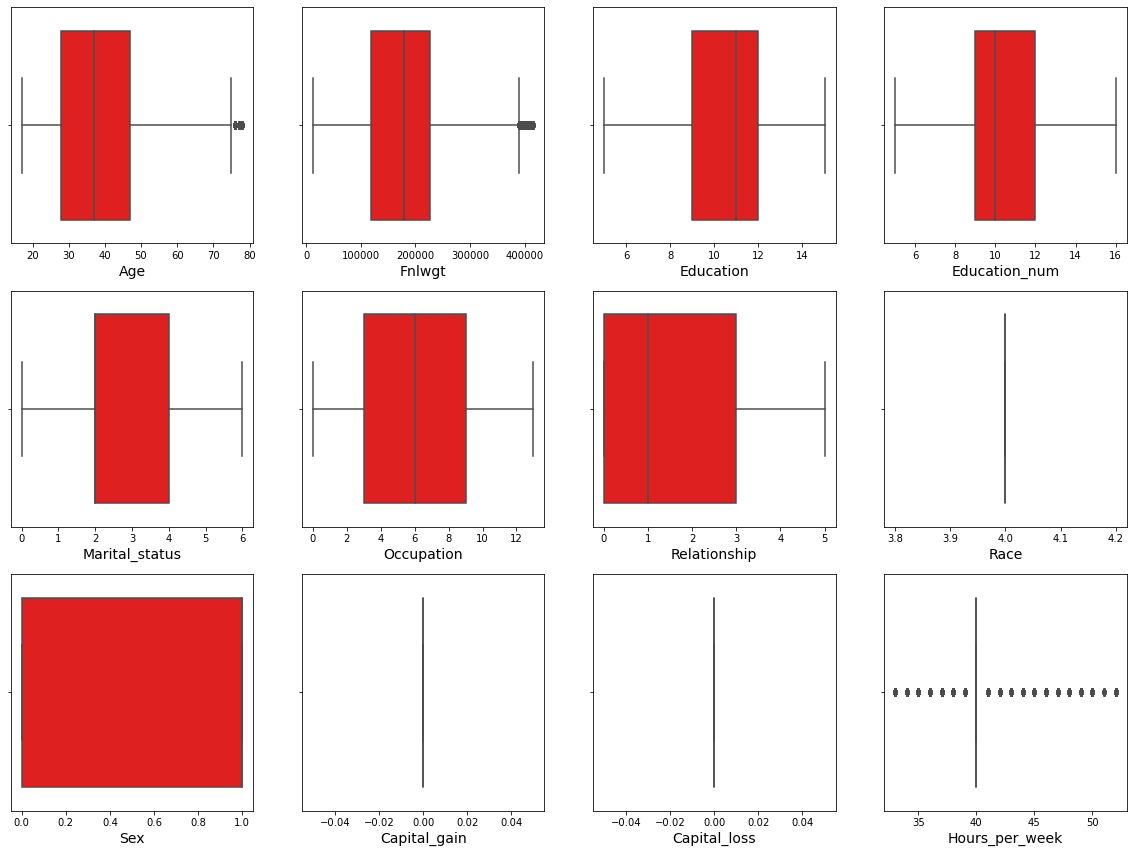

In [47]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Outliers are still present in some of the feature variables that can be treated using normalization techniques later

# Balancing Target Variable

In [48]:
Y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

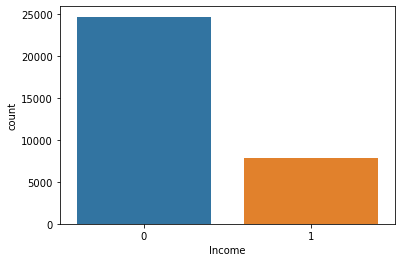

In [49]:
sns.countplot(Y)

In [50]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X_new,Y,)
X,Y

(             Age         Fnlwgt  Education  Education_num  Marital_status  \
 0      50.000000   83311.000000   9.000000      13.000000               2   
 1      38.000000  215646.000000  11.000000       9.000000               0   
 2      53.000000  234721.000000  11.000000       7.000000               2   
 3      28.000000  338409.000000   9.000000      13.000000               2   
 4      37.000000  284582.000000  12.000000      14.000000               2   
 ...          ...            ...        ...            ...             ...   
 49389  46.217653  229727.641196  13.494119      14.747059               2   
 49390  53.162699  120781.000000  11.837301      15.540675               2   
 49391  51.329883  213921.659765   9.402418      14.207254               2   
 49392  32.874374  164517.025137  10.527639       9.944722               2   
 49393  53.000000  177718.313414  10.210310      10.579379               2   
 
        Occupation  Relationship  Race  Sex  Capital_gain  Cap

<AxesSubplot:xlabel='Income', ylabel='count'>

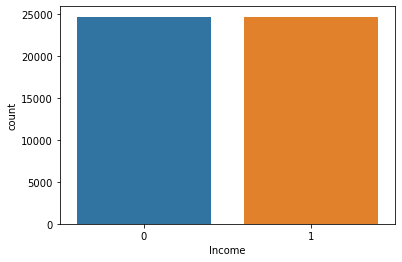

In [51]:
sns.countplot(Y)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [52]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [53]:
X.mean()

1.2112923290611887e-10

In [54]:
X.std()

0.8660254037844388

mean = 0 and Standard deviation = 0.86, our feature variable are almost normalized now

# Feature Scaling using Standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.811209,-1.142428,-0.908294,1.008563,-0.245311,-0.766106,-0.892905,0.0,0.664097,0.0,0.0,-0.328076
1,-0.129669,0.490744,-0.051295,-0.806471,-1.963060,-0.201440,0.564015,0.0,0.664097,0.0,0.0,-0.328076
2,1.031949,0.689911,-0.051295,-1.763934,-0.245311,-0.201440,-0.892905,0.0,0.664097,0.0,0.0,-0.328076
3,-1.007509,1.683833,-0.908294,1.008563,-0.245311,0.792755,1.570609,0.0,-1.505805,0.0,0.0,-0.328076
4,-0.213008,1.184422,0.368212,1.446003,-0.245311,-0.766106,1.570609,0.0,-1.505805,0.0,0.0,-0.328076


# Model Building

As this is a binary classification Problem, I will train the follwoing models -

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [56]:
#importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [57]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('test accuracy is :',maxAccu,'at random_state:',maxRS)

test accuracy is : 0.7828727604008503 at random_state: 135


# Creating the Training and Testing data set

In [58]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20, stratify = Y)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [59]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=KFold(n_splits=10, shuffle = True)).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual', fontsize = 14)
    plt.ylabel('Predicted', fontsize = 14)
    plt.show()

# A) Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      4939
           1       0.76      0.80      0.78      4940

    accuracy                           0.77      9879
   macro avg       0.77      0.77      0.77      9879
weighted avg       0.77      0.77      0.77      9879

Accuracy : 0.7700172082194554
Cross validation score : 0.7734139825711741
Accuracy and CV Score Diff : 0.003396774351718701
ROC AUC Score : 0.7700143983317118


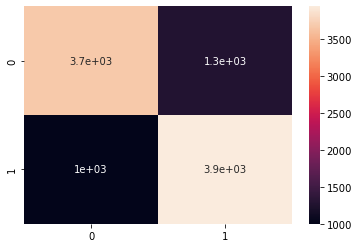

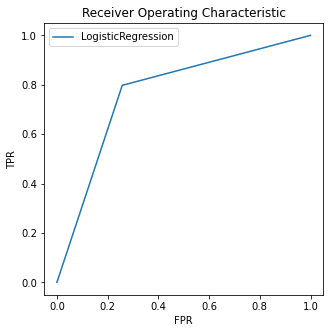

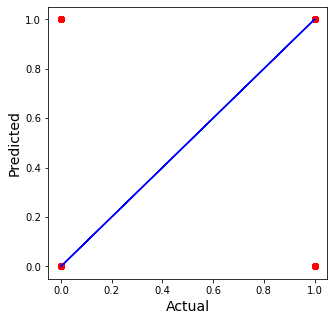

In [60]:
reg_func(LogisticRegression(),X,Y, 'LogisticRegression','lr')

# B) Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4939
           1       0.83      0.83      0.83      4940

    accuracy                           0.83      9879
   macro avg       0.83      0.83      0.83      9879
weighted avg       0.83      0.83      0.83      9879

Accuracy : 0.8301447514930661
Cross validation score : 0.8353443098924285
Accuracy and CV Score Diff : 0.0051995583993623695
ROC AUC Score : 0.8301444833445771


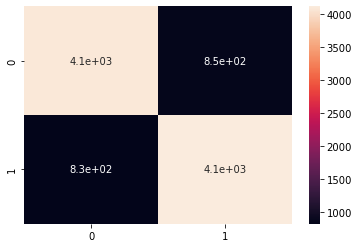

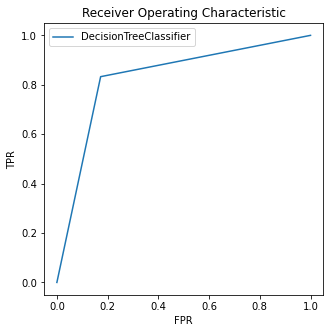

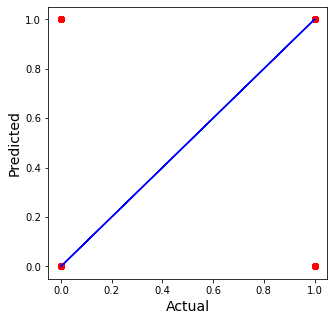

In [63]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y, 'DecisionTreeClassifier','dtc')

# C) Random Forests Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4939
           1       0.88      0.85      0.86      4940

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879

Accuracy : 0.86648446199008
Cross validation score : 0.8696805562272681
Accuracy and CV Score Diff : 0.0031960942371881407
ROC AUC Score : 0.8664859053734919


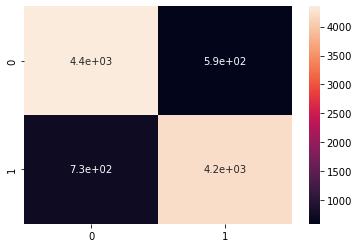

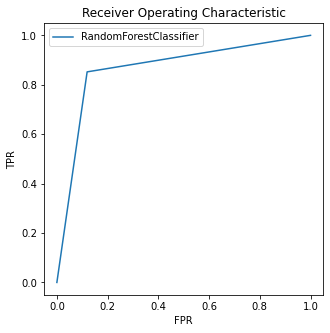

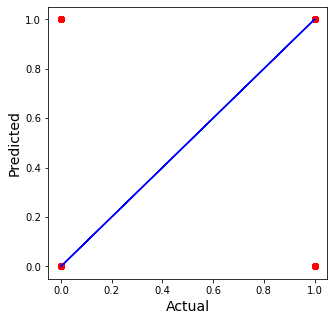

In [64]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y,'RandomForestClassifier','rfc')

# D) SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      4939
           1       0.80      0.89      0.84      4940

    accuracy                           0.83      9879
   macro avg       0.84      0.83      0.83      9879
weighted avg       0.84      0.83      0.83      9879

Accuracy : 0.8312582245166514
Cross validation score : 0.8361340458861266
Accuracy and CV Score Diff : 0.004875821369475175
ROC AUC Score : 0.8312523720564982


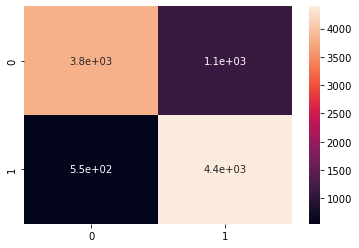

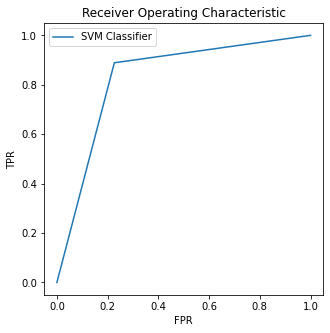

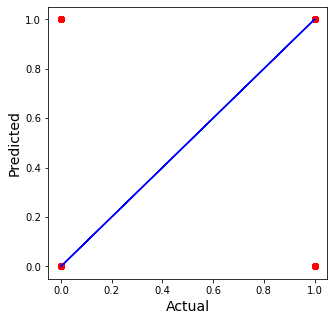

In [65]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y,'SVM Classifier','svmc')

# E) SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.72      0.76      4939
           1       0.74      0.81      0.78      4940

    accuracy                           0.77      9879
   macro avg       0.77      0.77      0.77      9879
weighted avg       0.77      0.77      0.77      9879

Accuracy : 0.7662718898673955
Cross validation score : 0.769405250124392
Accuracy and CV Score Diff : 0.003133360256996509
ROC AUC Score : 0.7662673482887994


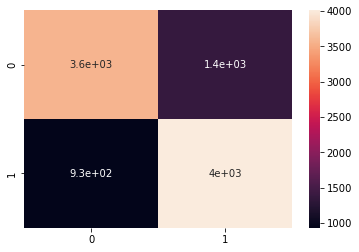

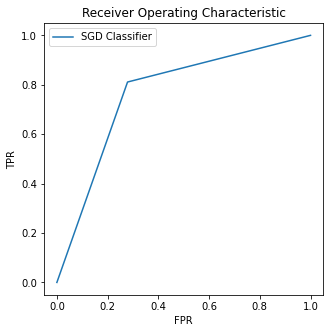

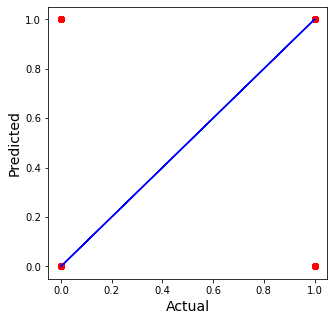

In [66]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(),X,Y,'SGD Classifier','sgdc')

# F) KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      4939
           1       0.83      0.84      0.84      4940

    accuracy                           0.84      9879
   macro avg       0.84      0.84      0.84      9879
weighted avg       0.84      0.84      0.84      9879

Accuracy : 0.835610891790667
Cross validation score : 0.8374094069100517
Accuracy and CV Score Diff : 0.0017985151193846693
ROC AUC Score : 0.835610316304256


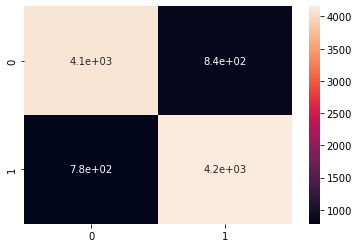

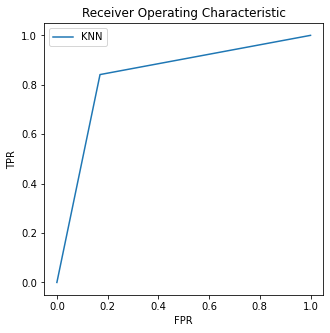

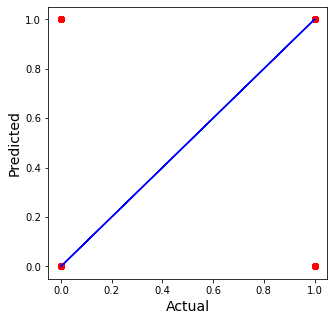

In [67]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(),X,Y,'KNN','knn')

# G) ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      4939
           1       0.84      0.87      0.85      4940

    accuracy                           0.85      9879
   macro avg       0.85      0.85      0.85      9879
weighted avg       0.85      0.85      0.85      9879

Accuracy : 0.8499848162769511
Cross validation score : 0.8553667742408806
Accuracy and CV Score Diff : 0.0053819579639294846
ROC AUC Score : 0.8499830728408855


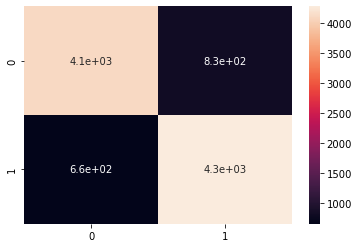

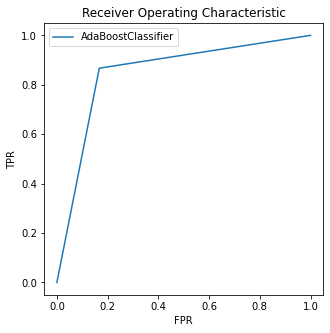

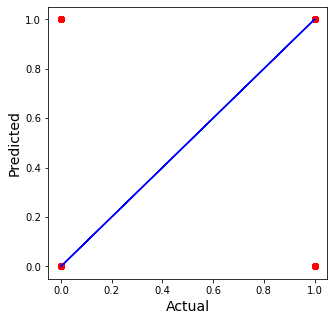

In [68]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# H) Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4939
           1       0.88      0.85      0.86      4940

    accuracy                           0.87      9879
   macro avg       0.87      0.87      0.87      9879
weighted avg       0.87      0.87      0.87      9879

Accuracy : 0.8653709889664946
Cross validation score : 0.8704094569127976
Accuracy and CV Score Diff : 0.005038467946303027
ROC AUC Score : 0.865372340120318


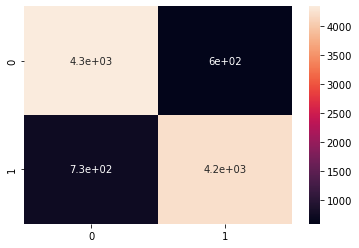

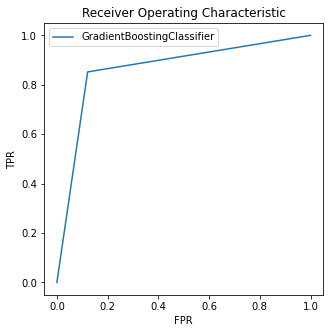

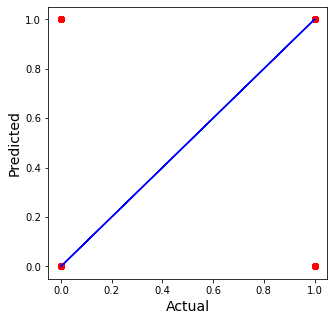

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# I) Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      4939
           1       0.88      0.83      0.86      4940

    accuracy                           0.86      9879
   macro avg       0.86      0.86      0.86      9879
weighted avg       0.86      0.86      0.86      9879

Accuracy : 0.8596011742079158
Cross validation score : 0.8614204591563634
Accuracy and CV Score Diff : 0.0018192849484476303
ROC AUC Score : 0.8596040930116654


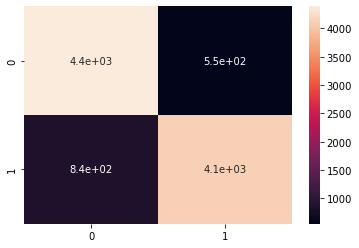

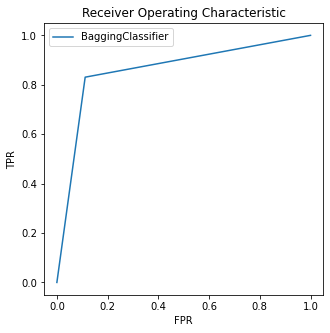

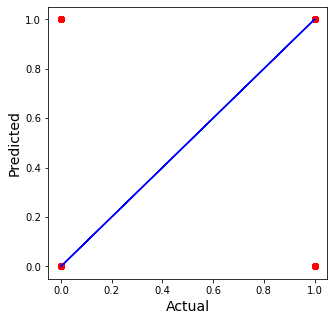

In [70]:
from sklearn.ensemble import BaggingClassifier

reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

# Analysing Scores

In [77]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5,6,7,8,9,10
lr,LogisticRegression,0.770017,0.773414,0.003397,3666,1273,999,3941,0.770014,"[0.0, 0.2577444826888034, 1.0]","[0.0, 0.7977732793522267, 1.0]"
dtc,DecisionTreeClassifier,0.830145,0.835344,0.0052,4087,852,826,4114,0.830144,"[0.0, 0.17250455557805225, 1.0]","[0.0, 0.8327935222672065, 1.0]"
rfc,RandomForestClassifier,0.866484,0.869681,0.003196,4350,589,730,4210,0.866486,"[0.0, 0.11925490990078963, 1.0]","[0.0, 0.8522267206477733, 1.0]"
svmc,SVM Classifier,0.831258,0.836134,0.004876,3820,1119,548,4392,0.831252,"[0.0, 0.2265640817979348, 1.0]","[0.0, 0.8890688259109312, 1.0]"
sgdc,SGD Classifier,0.766272,0.769405,0.003133,3563,1376,933,4007,0.766267,"[0.0, 0.27859890666126746, 1.0]","[0.0, 0.8111336032388664, 1.0]"
knn,KNN,0.835611,0.837409,0.001799,4099,840,784,4156,0.83561,"[0.0, 0.17007491395019234, 1.0]","[0.0, 0.8412955465587044, 1.0]"
abc,AdaBoostClassifier,0.849985,0.855367,0.005382,4113,826,656,4284,0.849983,"[0.0, 0.16724033205102248, 1.0]","[0.0, 0.8672064777327935, 1.0]"
gbc,GradientBoostingClassifier,0.865371,0.870409,0.005038,4340,599,731,4209,0.865372,"[0.0, 0.12127961125733955, 1.0]","[0.0, 0.8520242914979758, 1.0]"
bc,BaggingClassifier,0.859601,0.86142,0.001819,4388,551,836,4104,0.859604,"[0.0, 0.11156104474589998, 1.0]","[0.0, 0.8307692307692308, 1.0]"


In [78]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,True +ve,False +ve,False -ve,True -ve,ROC Score,FPR,TPR
lr,LogisticRegression,0.770017,0.773414,0.003397,3666,1273,999,3941,0.770014,"[0.0, 0.2577444826888034, 1.0]","[0.0, 0.7977732793522267, 1.0]"
dtc,DecisionTreeClassifier,0.830145,0.835344,0.0052,4087,852,826,4114,0.830144,"[0.0, 0.17250455557805225, 1.0]","[0.0, 0.8327935222672065, 1.0]"
rfc,RandomForestClassifier,0.866484,0.869681,0.003196,4350,589,730,4210,0.866486,"[0.0, 0.11925490990078963, 1.0]","[0.0, 0.8522267206477733, 1.0]"
svmc,SVM Classifier,0.831258,0.836134,0.004876,3820,1119,548,4392,0.831252,"[0.0, 0.2265640817979348, 1.0]","[0.0, 0.8890688259109312, 1.0]"
sgdc,SGD Classifier,0.766272,0.769405,0.003133,3563,1376,933,4007,0.766267,"[0.0, 0.27859890666126746, 1.0]","[0.0, 0.8111336032388664, 1.0]"
knn,KNN,0.835611,0.837409,0.001799,4099,840,784,4156,0.83561,"[0.0, 0.17007491395019234, 1.0]","[0.0, 0.8412955465587044, 1.0]"
abc,AdaBoostClassifier,0.849985,0.855367,0.005382,4113,826,656,4284,0.849983,"[0.0, 0.16724033205102248, 1.0]","[0.0, 0.8672064777327935, 1.0]"
gbc,GradientBoostingClassifier,0.865371,0.870409,0.005038,4340,599,731,4209,0.865372,"[0.0, 0.12127961125733955, 1.0]","[0.0, 0.8520242914979758, 1.0]"
bc,BaggingClassifier,0.859601,0.86142,0.001819,4388,551,836,4104,0.859604,"[0.0, 0.11156104474589998, 1.0]","[0.0, 0.8307692307692308, 1.0]"


# ROC AUC CURVE for all the Model

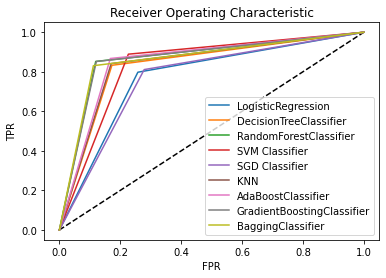

In [79]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

# Visualizing Accuracy Score for all Models

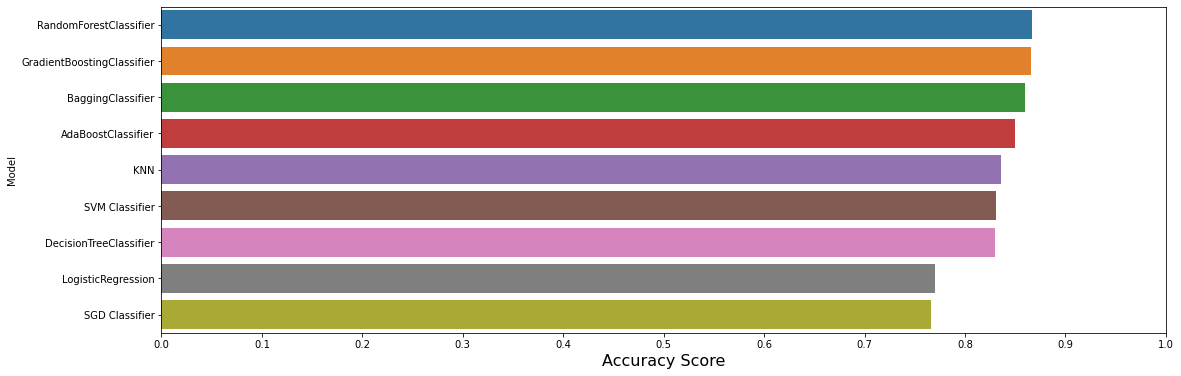

In [80]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest classifier has highest accuracy score 86.6%

# Visualizing Cross Validation Score for all Models

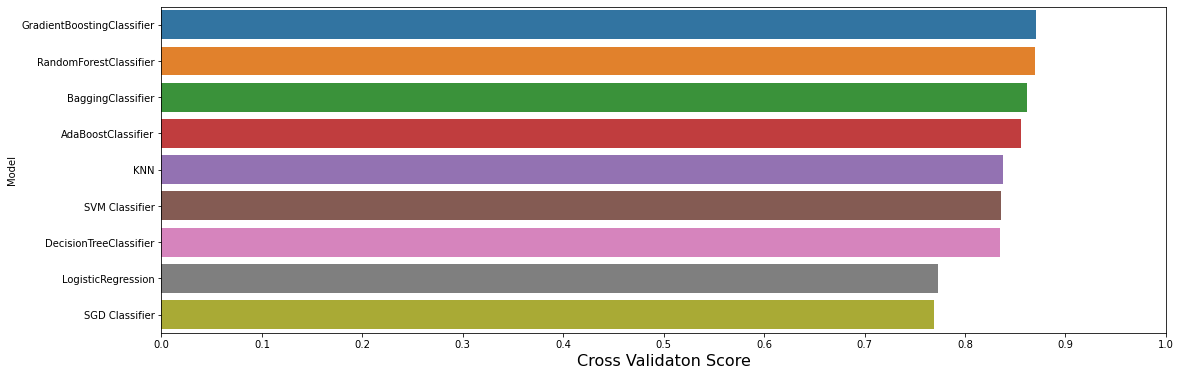

In [83]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier and Gradient Boost classifier has highest cross validation score as 87.0%

# Visualizing False Predictions for all Models

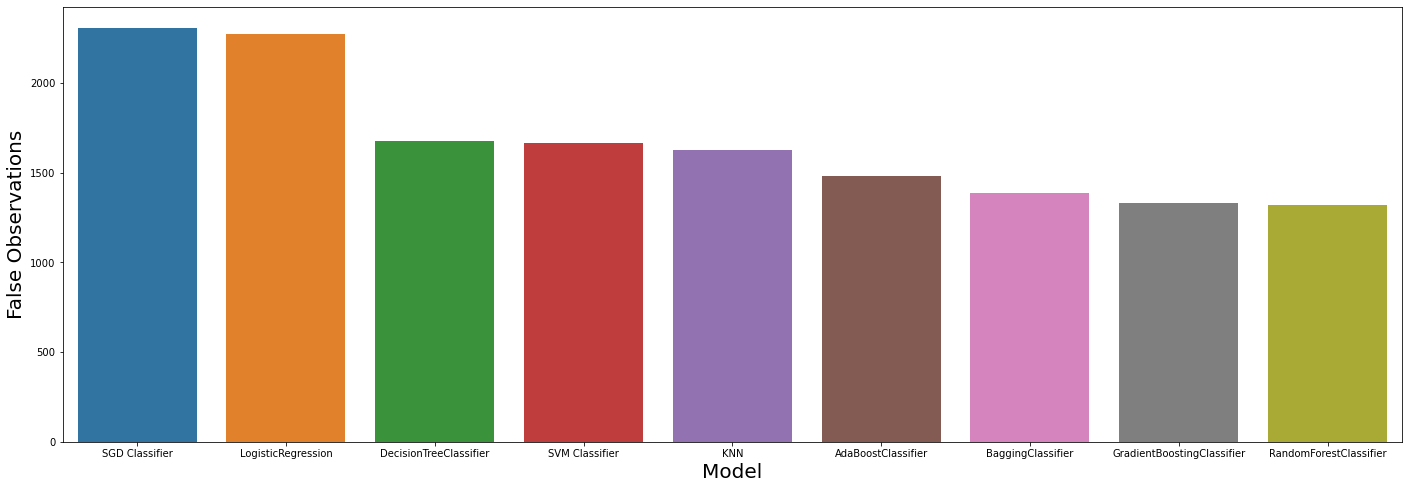

In [82]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Random Forest classfier has least false perdictions

Hence, Random Forest Classifier can be choosen as the best model for this binary classification problem

# Hyper Parameter Tuning with Random Forest Classifier

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy','log_loss'],"max_depth":['auto',2,4,6,8,10],'n_estimators':[100,200,300]}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=KFold(n_splits=10, shuffle = True),scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4939
           1       0.87      0.86      0.86      4940

    accuracy                           0.86      9879
   macro avg       0.86      0.86      0.86      9879
weighted avg       0.86      0.86      0.86      9879

Accuracy : 0.8626379188176941
Cross validation score : 0.8678988641179475
Accuracy and CV Score Diff : 0.005260945300253339
ROC AUC Score : 0.8626386654021163


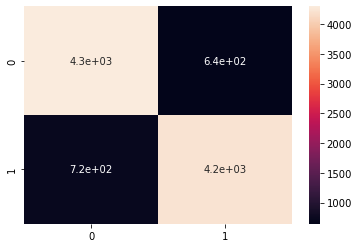

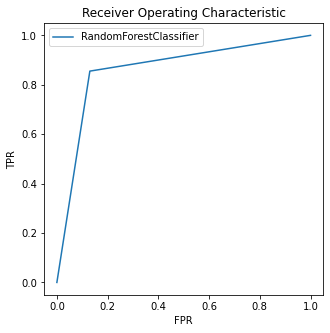

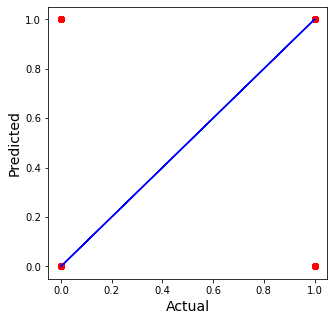

In [85]:
GCV.best_estimator_
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 100) 
reg_func(rfc, X, Y,'RandomForestClassifier','rfc')

# Saving the Model

In [86]:
import pickle
filename = 'census_income_project.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [87]:
loaded_model = pickle.load(open('census_income_project.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

86.26379188176941


In [88]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9869,9870,9871,9872,9873,9874,9875,9876,9877,9878
Predicted,1,0,1,0,0,1,1,1,1,0,...,1,0,0,1,1,1,1,0,0,1
Original,1,0,1,0,0,0,1,1,1,0,...,1,0,0,1,1,1,1,0,0,1


# This model is 86% Accurate